In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14,8

In [ ]:
missing_values = ["?"]
path_c = "/content/drive/My Drive/processed.cleveland.csv"
df_c = pd.read_csv(path_c, header=None, na_values=missing_values)
path_h = "/content/drive/My Drive/processed.hungarian.csv"
df_h = pd.read_csv(path_h, header=None, na_values=missing_values)
path_s = "/content/drive/My Drive/processed.switzerland.csv"
df_s = pd.read_csv(path_s, header=None, na_values=missing_values)
path_v = "/content/drive/My Drive/processed.va.csv"
df_v = pd.read_csv(path_v, header=None, na_values=missing_values)

In [ ]:
df1 = df_c
df1 = df1.append(df_h, ignore_index=True)

In [ ]:
df2=df1
df2=df2.append(df_s, ignore_index=True)

In [ ]:
df3=df2
df3=df3.append(df_v, ignore_index=True)

In [ ]:
df=df3.iloc[1:,:]

###Data Exploration

In [ ]:
print(df.head())

   0   1   2      3      4    5    6      7    8    9    10   11   12  13
1  63   1   1  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
2  67   1   4  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
3  67   1   4  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
4  37   1   3  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
5  41   0   2  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


Missing Values

In [ ]:
df.isnull().sum()

0       0
1       0
2       0
3      59
4      30
5      90
6       2
7      55
8      55
9      62
10    309
11    611
12    486
13      0
dtype: int64

Data Description

In [ ]:
print(df.describe())

               0           1           2   ...          11          12          13
count  920.000000  920.000000  920.000000  ...  309.000000  434.000000  920.000000
mean    53.510870    0.789130    3.250000  ...    0.676375    5.087558    0.995652
std      9.424685    0.408148    0.930969  ...    0.935653    1.919075    1.142693
min     28.000000    0.000000    1.000000  ...    0.000000    3.000000    0.000000
25%     47.000000    1.000000    3.000000  ...    0.000000    3.000000    0.000000
50%     54.000000    1.000000    4.000000  ...    0.000000    6.000000    1.000000
75%     60.000000    1.000000    4.000000  ...    1.000000    7.000000    2.000000
max     77.000000    1.000000    4.000000  ...    3.000000    7.000000    4.000000

[8 rows x 14 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 1 to 920
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       920 non-null    int64  
 1   1       920 non-null    int64  
 2   2       920 non-null    int64  
 3   3       861 non-null    float64
 4   4       890 non-null    float64
 5   5       830 non-null    float64
 6   6       918 non-null    float64
 7   7       865 non-null    float64
 8   8       865 non-null    float64
 9   9       858 non-null    float64
 10  10      611 non-null    float64
 11  11      309 non-null    float64
 12  12      434 non-null    float64
 13  13      920 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 100.8 KB
None


In [ ]:
cat = [1,2,5,6,8,10,11,12,13]
for c in cat:
  df.iloc[:,c] = pd.Series(df.iloc[:,c], dtype="category")

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 1 to 920
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       920 non-null    int64   
 1   1       920 non-null    category
 2   2       920 non-null    category
 3   3       861 non-null    float64 
 4   4       890 non-null    float64 
 5   5       830 non-null    category
 6   6       918 non-null    category
 7   7       865 non-null    float64 
 8   8       865 non-null    category
 9   9       858 non-null    float64 
 10  10      611 non-null    category
 11  11      309 non-null    category
 12  12      434 non-null    category
 13  13      920 non-null    category
dtypes: category(9), float64(4), int64(1)
memory usage: 45.3 KB
None


In [ ]:
'''#Dep var categories
a= df.iloc[:,13]
a= list(a)
groups=[[] for k in range(5)]

for j in range(0,5):
  def f(b):
    if j==b:
      groups[b].append(b)

  for i in range(0,len(a)):
    f(a[i])
  print(groups[j])

print(groups)'''

'#Dep var categories\na= df.iloc[:,13]\na= list(a)\ngroups=[[] for k in range(5)]\n\nfor j in range(0,5):\n  def f(b):\n    if j==b:\n      groups[b].append(b)\n\n  for i in range(0,len(a)):\n    f(a[i])\n  print(groups[j])\n\nprint(groups)'

Frequency of each level of the response variable

RecursionError: ignored

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/usr/lib/python3.6/abc.py", line 184, in __instancecheck__
    if subclass in cls._abc_cache:
RecursionError: maximum recursion depth exceeded while calling a Python object


<BarContainer object of 5 artists>

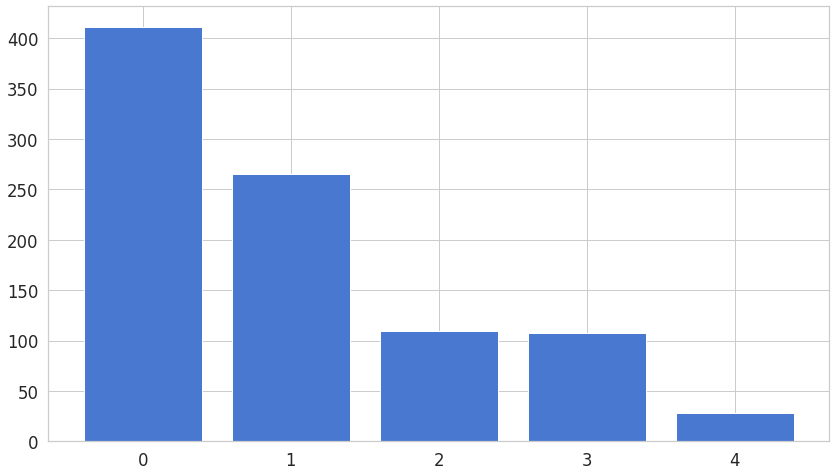

In [ ]:
LABELS = ['0', '1', '2', '3', '4']
count_classes = pd.value_counts(df.iloc[:,13], sort=True)
fig, ax = plt.subplots(1, 1, sharex=True)
ax.bar(LABELS, height = [count_classes[0], count_classes[1], count_classes[2], count_classes[3], count_classes[4]]) #top axis

In [ ]:
print(count_classes)

0    411
1    265
2    109
3    107
4     28
Name: 13, dtype: int64


Graph shows frequency of each level.

#Imputation

## Imputers:

In [ ]:
Y = df.iloc[:,13]
df_drop = df   #considered dropping columns 11 and 12 as more than 50% of observations in these two col. is missing
df_drop.drop([11,12], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,13
1,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
2,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2
3,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
4,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
5,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,1
917,62,1,1,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,0
918,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,2
919,58,1,4,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,0


####1. Simple Imputer

Median (For numerical variables)

In [ ]:
def med(x):
  a = df.iloc[:,x].isnull()
  a = a.to_list()
  t = [-1]*920
  f = [-2]*920


  for i in range(0,len(df.iloc[:,x])):
    if a[i]==True:
      t[i]=i
  t=[j for j in t if j!=-1]

  for k in range(0,len(df.iloc[:,x])):
    if a[k]==False:
      f[k]=k
  f=[l for l in f if l!=-2]

  df.iloc[t,x]= np.median(df.iloc[f,x])         #df.iloc[t/f,x] - chained indexing: [[],_]
  return np.median(df.iloc[f,x]), df.iloc[:,x].isnull().sum()
  #return df.iloc[:,x].isnull().sum()

In [ ]:
b = [3,4,7,9]
for n in range(0,len(b)):
  med(b[n])
  print(df.iloc[:,b[n]].isnull().sum())

0
0
0
0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
df = imp.fit_transform(df)
df = pd.DataFrame(df)

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [ ]:
X_s = df.iloc[:,0:13]
X_s = scale(X_s)
X_s = pd.DataFrame(X_s)
Xs_drop = df_drop.iloc[:,0:13]
Xs_drop = scale(Xs_drop)
Xs_drop = pd.DataFrame(Xs_drop)

In [ ]:
X_s.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.007386,0.516931,-2.418152,0.705176,0.303643,2.380476,1.735069,0.489727,-0.760292,1.368109,2.234081,-0.361400,1.200186
1,1.432034,0.516931,0.806051,1.518569,0.789967,-0.420084,1.735069,-1.181478,1.315283,0.611589,0.295067,4.411152,-0.586499
2,1.432034,0.516931,0.806051,-0.650479,0.266939,-0.420084,1.735069,-0.345875,1.315283,1.651804,0.295067,2.820301,1.795748
3,-1.752828,0.516931,-0.268684,-0.108217,0.459634,-0.420084,-0.749388,1.961979,-0.760292,2.502889,2.234081,-0.361400,-0.586499
4,-1.328180,-1.934494,-1.343418,-0.108217,0.037541,-0.420084,1.735069,1.365120,-0.760292,0.517024,-1.643946,-0.361400,-0.586499


####2. Iterative Imputer

In [ ]:
df=df3.iloc[1:,:]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=1)
# Run df = df3.iloc[1:,:] again before this
imp.fit(df)
df=np.round(imp.transform(df))
df = pd.DataFrame(df)

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [ ]:
X_i = df.iloc[:,0:13]
X_i = scale(X_i)
X_i = pd.DataFrame(X_i)
Xi_drop = df_drop.iloc[:,0:13]
Xi_drop = scale(Xi_drop)
Xi_drop = pd.DataFrame(Xi_drop)

In [ ]:
X_i.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.007386,0.516931,-2.418152,0.681182,0.310151,2.380476,1.734021,0.505253,-0.805447,0.997606,2.216584,-0.815084,0.563056
1,1.432034,0.516931,0.806051,1.491554,0.795921,-0.420084,1.734021,-1.153595,1.241546,0.997606,0.536800,3.194956,-1.360255
2,1.432034,0.516931,0.806051,-0.669438,0.273490,-0.420084,1.734021,-0.324171,1.241546,1.901840,0.536800,1.858276,1.204160
3,-1.752828,0.516931,-0.268684,-0.129190,0.465964,-0.420084,-0.750869,1.966619,-0.805447,2.806075,2.216584,-0.815084,-1.360255
4,-1.328180,-1.934494,-1.343418,-0.129190,0.044353,-0.420084,1.734021,1.374173,-0.805447,0.093372,-1.142983,-0.815084,-1.360255


####3. KNN Imputer

In [ ]:
df=df3.iloc[1:,:]

In [ ]:
from sklearn.impute import KNNImputer
# Run df = df3.iloc[1:,:] again before this
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df = imputer.fit_transform(df)
df = pd.DataFrame(df)

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [ ]:
X_k = df.iloc[:,0:13]
X_k = scale(X_k)
X_k = pd.DataFrame(X_k)
Xk_drop = df_drop.iloc[:,0:13]
Xk_drop = scale(Xk_drop)
Xk_drop = pd.DataFrame(Xk_drop)

In [ ]:
X_k.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.007386,0.516931,-2.418152,0.672339,0.305351,2.154172,1.734909,0.510314,-0.811660,1.322751,2.205649,-0.997000,0.297101
1,1.432034,0.516931,0.806051,1.473225,0.789826,-0.500668,1.734909,-1.134611,1.271261,0.578337,0.442663,2.764749,-1.523098
2,1.432034,0.516931,0.806051,-0.662473,0.268786,-0.500668,1.734909,-0.312148,1.271261,1.601906,0.442663,1.510833,0.903834
3,-1.752828,0.516931,-0.268684,-0.128548,0.460748,-0.500668,-0.750285,1.959415,-0.811660,2.439372,2.205649,-0.997000,-1.523098
4,-1.328180,-1.934494,-1.343418,-0.128548,0.040260,-0.500668,1.734909,1.371942,-0.811660,0.485285,-1.320323,-0.997000,-1.523098


In [ ]:
imptx = [X_s, Xs_drop, X_i, Xi_drop, X_k, Xk_drop] #w2:0-16, 17-33, 34-50, 51-67, 68-84

In [ ]:
w = np.arange(0.05, 1, 0.05)

# Classification

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelBinarizer

## Models

PNN

In [ ]:
pip install neupy

     |████████████████████████████████| 235kB 3.5MB/s 
     |████████████████████████████████| 92.6MB 44kB/s 
     |████████████████████████████████| 3.2MB 50.9MB/s 
     |████████████████████████████████| 368kB 45.8MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0


In [ ]:
from neupy import algorithms

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
pnn = algorithms.PNN(std=10, verbose=False)

In [ ]:
w2 = np.arange(0.15, 1, 0.05)
print(w2)

[0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9  0.95]


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
ker = ['linear', 'poly', 'rbf', 'sigmoid']
def test_svm(e,f,k,t):
  x_train, x_test, y_train, y_test = train_test_split(e, f, test_size = t, random_state = 1)
  svclassifier = SVC(C=1.0, kernel=k, probability=True)
  svclassifier.fit(x_train, y_train)
  y_pred = svclassifier.predict_proba(x_test)
  return metrics.roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovo')

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def test_dt(x,y,t):
  dtclf = DecisionTreeClassifier()
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = t, random_state = 1)
  clf = dtclf.fit(x_train,y_train)
  y_pred = clf.predict_proba(x_test)
  fpr, tpr, threshold = roc_curve(y_test, y_pred)
  return metrics.roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovo')

## Results

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
Y1 = Y
Y1 = label_binarize(Y, classes=[0, 1, 2, 3, 4])
n_classes = 5

### PNN

In [ ]:
result_pnn = []
for a in range(0,len(imptx)):
  for i in w2:
    x_train, x_test, y_train, y_test = train_test_split(imptx[a], Y, test_size = i, random_state = 1)
    pnn.train(x_train, y_train)
    y_pred = pnn.predict_proba(x_test)
    result_pnn.append(metrics.roc_auc_score(y_test, y_pred, average='weighted',  multi_class='ovo'))

for a in range(0,len(imptx)):
  for i in w2:
    x_train, x_test, y_train, y_test = train_test_split(imptx[a], Y, test_size = i, random_state = 1)
    pnn.train(x_train, y_train)
    y_pred = pnn.predict_proba(x_test)
    if metrics.roc_auc_score(y_test, y_pred, average='weighted',  multi_class='ovo') == max(result_pnn):
      print(str(a) + "," + str(i) + ": " + str(max(result_pnn)))   #X_i, 0.3

2,0.30000000000000004: 0.7929348279077522


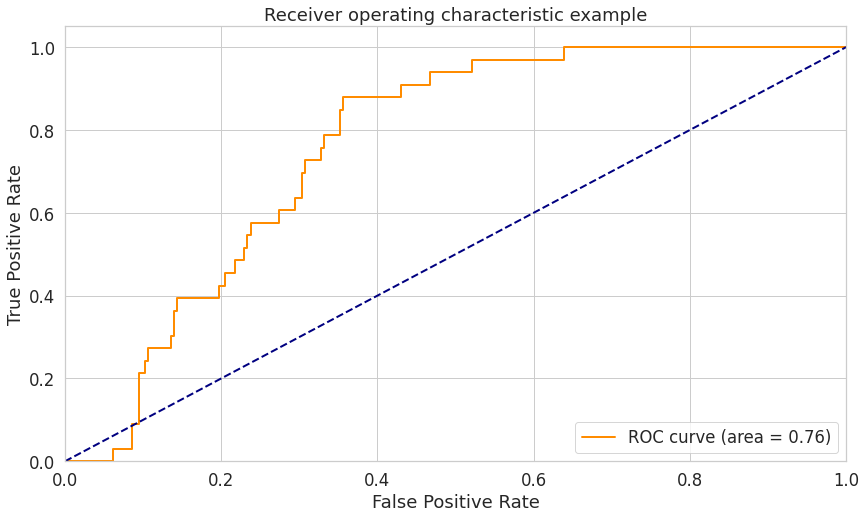

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = 0.30000000000000004, random_state = 1)
pnn_clf = OneVsRestClassifier(algorithms.PNN(std=10, verbose=False))
y_pred = pnn_clf.fit(x_train, y_train).predict_proba(x_test)
fpr_pnn = dict()
tpr_pnn = dict()
roc_auc_pnn = dict()
for i in range(n_classes):
  fpr_pnn[i], tpr_pnn[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
  roc_auc_pnn[i] = auc(fpr_pnn[i], tpr_pnn[i])

  # Compute micro-average ROC curve and ROC area
fpr_pnn["micro"], tpr_pnn["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_pnn["micro"] = auc(fpr_pnn["micro"], tpr_pnn["micro"])

plt.figure()
lw = 2
plt.plot(fpr_pnn[2], tpr_pnn[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_pnn[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### SVM

In [ ]:
result_svm = []
for k in ker:
  for a in range(0,len(imptx)):
    for i in w2:
      result_svm.append(test_svm(imptx[a], Y, k, i))
print(max(result_svm), result_svm.index(max(result_svm)))    #k[0]-imptx2[0]: 0-18, imptx2[1]: 19-37, imptx2[2]: 38-56, imptx2[3]: 57-75, imptx2[4]: 76-94, imptx2[5]: 95-113
for k in ker:                                                #k[1]-imptx2[0]: 114-132, imptx2[1]: 133-151, imptx2[2]: 152-170, imptx2[3]: 171-189, imptx2[4]: 190-208, imptx2[5]: 209-227
  for a in range(0,len(imptx)):                              #k[2]-imptx2[0]: 228-246, imptx2[1]: 247-265, imptx2[2]: 266-284, imptx2[3]:285-303
    for i in w2:
      if test_svm(imptx[a], Y, k, i) == max(result_svm):
        print(str(a) + "," + str(i) + ", " + str(k) + ": " + str(max(result_svm)))  #k[2], imptx2[3], w[5]

0.8461637389886487 241


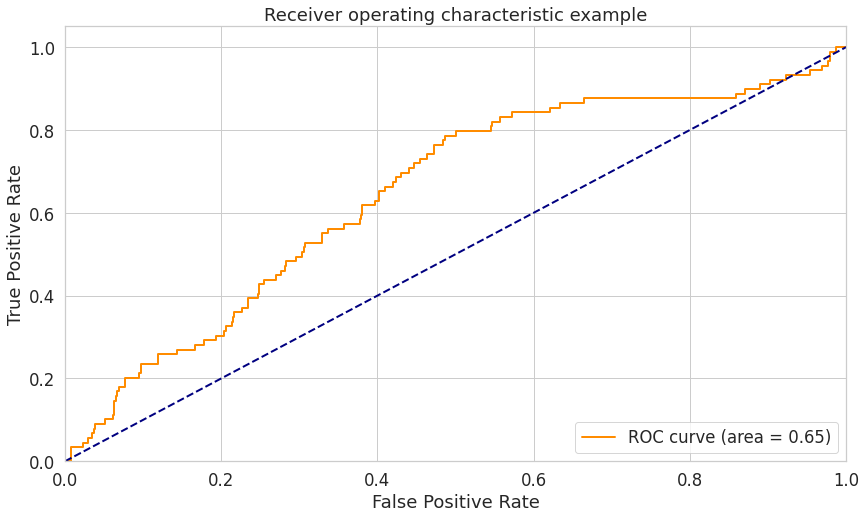

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_s, Y1, test_size = 0.8, random_state = 1)
svm_clf = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
y_pred = svm_clf.fit(x_train, y_train).predict_proba(x_test)
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes):
  fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
  roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

  # Compute micro-average ROC curve and ROC area
fpr_svm["micro"], tpr_svm["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_svm["micro"] = auc(fpr_svm["micro"], tpr_svm["micro"])

plt.figure()
lw = 2
plt.plot(fpr_svm[2], tpr_svm[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_svm[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [ ]:
result_dt = []
dtclf = DecisionTreeClassifier()
for a in range(0,len(imptx)):
  for i in w2:
    x_train, x_test, y_train, y_test = train_test_split(imptx[a], Y, test_size = i, random_state = 1)  #0:0-17, 1:18-34, 2:35
    clf = dtclf.fit(x_train, y_train)
    y_pred = clf.predict_proba(x_test)
    result_dt.append(metrics.roc_auc_score(y_test, y_pred, average='weighted',  multi_class='ovo'))
print(max(result_dt), result_dt.index(max(result_dt)))

0.6916896441754984 35


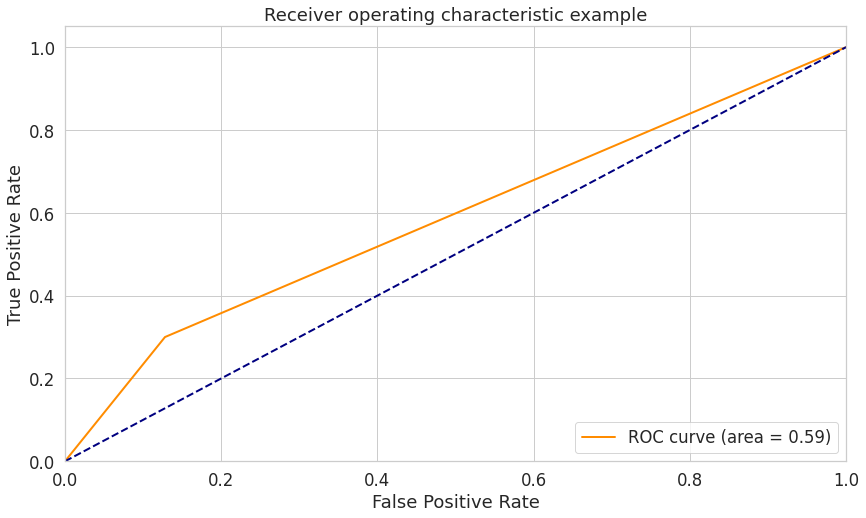

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = 0.2, random_state = 1)
dt_clf = OneVsRestClassifier(DecisionTreeClassifier())
y_pred = dt_clf.fit(x_train, y_train).predict_proba(x_test)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
  fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
  roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

  # Compute micro-average ROC curve and ROC area
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

plt.figure()
lw = 2
plt.plot(fpr_dt[2], tpr_dt[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_dt[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Ensemble Learning

###1.Bagging

####Bagged Decision Trees

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
kfold = model_selection.RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state = 1)
clf = DecisionTreeClassifier()
model_bag = BaggingClassifier(base_estimator = clf, n_estimators = 100, random_state = 1)
result_bag = []
for a in range(0,len(imptx)):
  r_bag = model_selection.cross_val_score(model_bag, imptx[a], Y, cv = kfold, n_jobs=-1)
  result_bag.append(r_bag.mean())
max_bag = max(result_bag)
for a in range(0,len(imptx)):
  if model_selection.cross_val_score(model_bag, imptx[a], Y, cv = kfold, n_jobs=-1).mean() == max_bag:
    print(str(a) + ":" + str(max_bag))

2:0.6590579710144926


In [ ]:
ra_bdt=[]
for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = i, random_state = 1)
  bdt_clf = OneVsRestClassifier(BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 1))
  y_pred = bdt_clf.fit(x_train, y_train).predict_proba(x_test)
  fpr = dict()
  tpr = dict()
  roc_auc_bdt = dict()
  for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
    roc_auc_bdt[j] = auc(fpr[j], tpr[j])
    ra_bdt.append(roc_auc_bdt[j])

for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = i, random_state = 1)
  bdt_clf = OneVsRestClassifier(BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 1))
  y_pred = bdt_clf.fit(x_train, y_train).predict_proba(x_test)
  fpr = dict()
  tpr = dict()
  roc_auc_bdt = dict()
  for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
    roc_auc_bdt[j] = auc(fpr[j], tpr[j])
    if roc_auc_bdt[j] == max(ra_bdt):
      print(str(i))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


0.15000000000000002


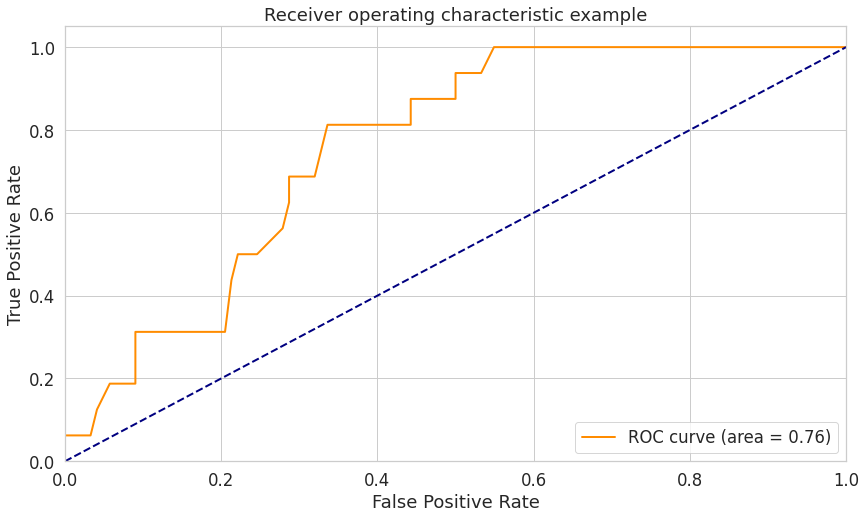

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = 0.15, random_state = 1)
bdt_clf = OneVsRestClassifier(BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 1))
y_pred = bdt_clf.fit(x_train, y_train).predict_proba(x_test)
fpr_bdt = dict()
tpr_bdt = dict()
roc_auc_bdt = dict()
for i in range(n_classes):
  fpr_bdt[i], tpr_bdt[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
  roc_auc_bdt[i] = auc(fpr_bdt[i], tpr_bdt[i])

  # Compute micro-average ROC curve and ROC area
fpr_bdt["micro"], tpr_bdt["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_bdt["micro"] = auc(fpr_bdt["micro"], tpr_bdt["micro"])

plt.figure()
lw = 2
plt.plot(fpr_bdt[2], tpr_bdt[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_bdt[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
kfold = model_selection.RepeatedStratifiedKFold(n_splits = 10, random_state = 1)
model_rf = RandomForestClassifier(n_estimators = 100, max_features = 3)
result_rf = []
for a in range(0,len(imptx)):
  r_rf = model_selection.cross_val_score(model_rf, imptx[a], Y, cv = kfold)
  result_rf.append(r_rf.mean())
print(result_rf.index(max(result_rf)), max(result_rf))

In [ ]:
ra_rf=[]
for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = i, random_state = 1)
  rf_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100, max_features = 3))
  y_pred = rf_clf.fit(x_train, y_train).predict_proba(x_test)
  fpr = dict()
  tpr = dict()
  roc_auc_rf = dict()
  for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
    roc_auc_rf[j] = auc(fpr[j], tpr[j])
    ra_rf.append(roc_auc_rf[j])

for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = i, random_state = 1)
  rf_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100, max_features = 3))
  y_pred = rf_clf.fit(x_train, y_train).predict_proba(x_test)
  fpr = dict()
  tpr = dict()
  roc_auc_rf = dict()
  for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
    roc_auc_rf[j] = auc(fpr[j], tpr[j])
    if roc_auc_rf[j] == max(ra_rf):
      print(str(i))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


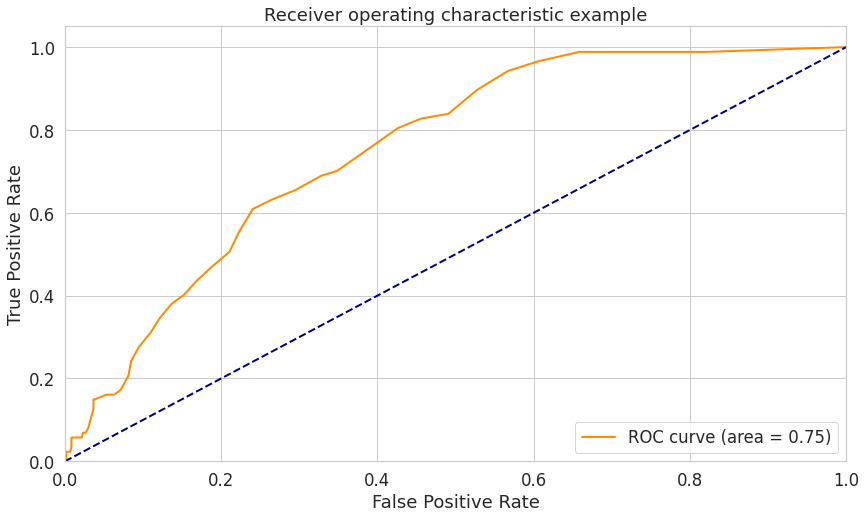

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = 0.75, random_state = 1)
rf_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100, max_features = 3))
y_pred = rf_clf.fit(x_train, y_train).predict_proba(x_test)
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for j in range(n_classes):
  fpr_rf[j], tpr_rf[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
  roc_auc_rf[j] = auc(fpr_rf[j], tpr_rf[j])
  # Compute micro-average ROC curve and ROC area
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

plt.figure()
lw = 2
plt.plot(fpr_rf[2], tpr_rf[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_rf[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 2.Boosting

In [ ]:
kfold = model_selection.KFold(n_splits = 10, random_state = 1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(n_estimators = 100, random_state = 1)
result_ada = []
for a in range(0,len(imptx)):
  r_ada = model_selection.cross_val_score(model_ada, imptx[a], Y, cv=kfold)
  result_ada.append(r_ada.mean())
max_ada = max(result_ada)
for a in range(0,len(imptx)):
  if model_selection.cross_val_score(model_ada, imptx[a], Y, cv=kfold).mean() == max_ada:
    print(str(a) + ": " + str(max_ada))

2: 0.5434782608695653


In [ ]:
ra_ada=[]
for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = i, random_state = 1)
  ada_clf = OneVsRestClassifier(AdaBoostClassifier(n_estimators = 100, random_state = 1))
  y_pred = ada_clf.fit(x_train, y_train).predict_proba(x_test)
  fpr = dict()
  tpr = dict()
  roc_auc_ada = dict()
  for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
    roc_auc_ada[j] = auc(fpr[j], tpr[j])
    ra_ada.append(roc_auc_ada[j])

for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = i, random_state = 1)
  ada_clf = OneVsRestClassifier(AdaBoostClassifier(n_estimators = 100, random_state = 1))
  y_pred = ada_clf.fit(x_train, y_train).predict_proba(x_test)
  fpr = dict()
  tpr = dict()
  roc_auc_ada = dict()
  for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
    roc_auc_ada[j] = auc(fpr[j], tpr[j])
    if roc_auc_ada[j] == max(ra_ada):
      print(str(i))
#print(ra_ada.index(max(ra_ada)))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


0.4


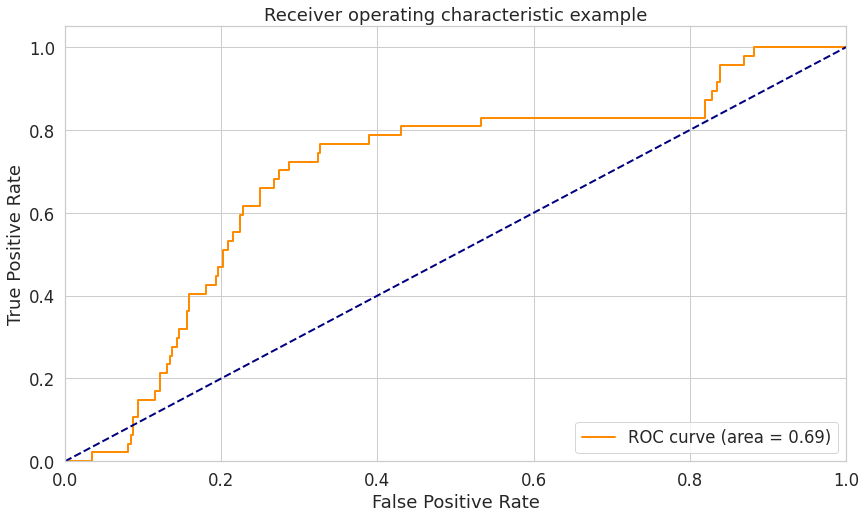

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = 0.4, random_state = 1)
ada_clf = OneVsRestClassifier(AdaBoostClassifier(n_estimators = 100, random_state = 1))
y_pred = ada_clf.fit(x_train, y_train).predict_proba(x_test)
fpr_ada = dict()
tpr_ada = dict()
roc_auc_ada = dict()
for j in range(n_classes):
  fpr_ada[j], tpr_ada[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
  roc_auc_ada[j] = auc(fpr_ada[j], tpr_ada[j])
  # Compute micro-average ROC curve and ROC area
fpr_ada["micro"], tpr_ada["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_ada["micro"] = auc(fpr_ada["micro"], tpr_ada["micro"])

plt.figure()
lw = 2
plt.plot(fpr_ada[2], tpr_ada[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_ada[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_sgb = GradientBoostingClassifier(n_estimators = 100, subsample = 0.9,random_state = 1)
result_sgb = []
for a in range(0,len(imptx)):
  r_sgb = model_selection.cross_val_score(model_sgb, imptx[a], Y, cv=kfold)
  result_sgb.append(r_sgb.mean())
max_sgb = max(result_sgb)
for a in range(0,len(imptx)):
  if model_selection.cross_val_score(model_sgb, imptx[a], Y, cv=kfold).mean() == max_sgb:
    print(str(a) + ": " + str(max_sgb))

2: 0.6119565217391304


In [ ]:
ra_sgb=[]
for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = i, random_state = 1)
  sgb_clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators = 100, subsample = 0.9,random_state = 1))
  y_pred = sgb_clf.fit(x_train, y_train).predict_proba(x_test)
  fpr = dict()
  tpr = dict()
  roc_auc_sgb = dict()
  for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
    roc_auc_sgb[j] = auc(fpr[j], tpr[j])
    ra_sgb.append(roc_auc_sgb[j])

for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = i, random_state = 1)
  sgb_clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators = 100, subsample = 0.9,random_state = 1))
  y_pred = sgb_clf.fit(x_train, y_train).predict_proba(x_test)
  fpr = dict()
  tpr = dict()
  roc_auc_sgb = dict()
  for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
    roc_auc_sgb[j] = auc(fpr[j], tpr[j])
    if roc_auc_sgb[j] == max(ra_sgb):
      print(str(i))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


0.15000000000000002


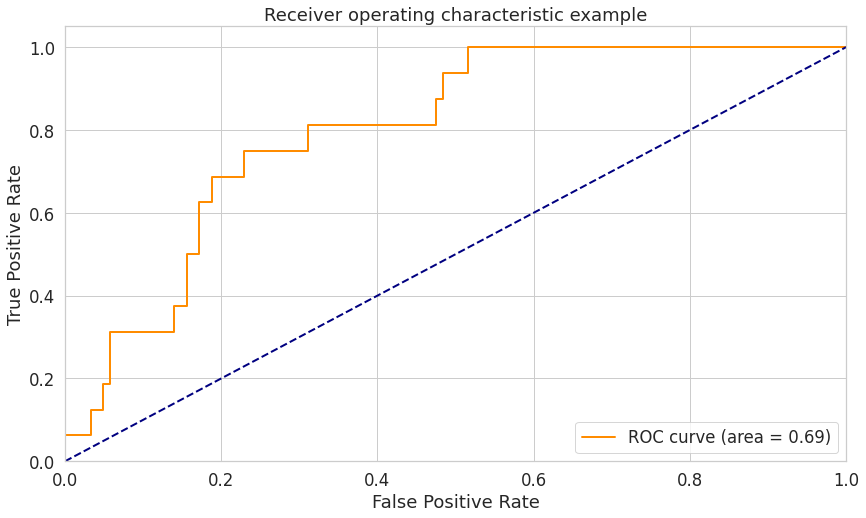

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = 0.15, random_state = 1)
sgb_clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators = 100, subsample = 0.9,random_state = 1))
y_pred = sgb_clf.fit(x_train, y_train).predict_proba(x_test)
fpr_sgb = dict()
tpr_sgb = dict()
roc_auc_sgb = dict()
for j in range(n_classes):
  fpr_sgb[j], tpr_sgb[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
  roc_auc_sgb[j] = auc(fpr_sgb[j], tpr_sgb[j])
fpr_sgb["micro"], tpr_sgb["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_ada["micro"] = auc(fpr_sgb["micro"], tpr_sgb["micro"])

plt.figure()
lw = 2
plt.plot(fpr_sgb[2], tpr_sgb[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_ada[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

####XGBoost

No Imputation

In [ ]:
pip install xgboost

In [ ]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, auc

In [ ]:
df=df3.iloc[1:,:]
X_xgb = df.iloc[:,0:13]
X_xgb = scale(X_xgb)

Xgb_drop = df_drop.iloc[:,0:13]
Xgb_drop = scale(Xgb_drop)

imptx_xg = [X_s, Xs_drop, X_i, Xi_drop, X_k, Xk_drop, X_xgb, Xgb_drop]

In [ ]:
param = {
    'eta': 0.3,
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 5}

steps = 20  # The number of training iterations

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  fpr_xg, tpr_xg, threshold = roc_curve(y_test, y_pred)
  return roc_auc_score(y_test, y_pred, average=average), fpr_xg, tpr_xg

In [ ]:
def test_xg(e,f,t):
  x_train, x_test, y_train, y_test = train_test_split(e, f, test_size=t)
  D_train = xgboost.DMatrix(x_train, label=y_train)
  D_test = xgboost.DMatrix(x_test, label=y_test)
  model = xgboost.train(param, D_train, steps)
  pred = model.predict(D_test)
  y_pred = np.asarray([np.argmax(line) for line in pred])
  return multiclass_roc_auc_score(y_test, y_pred)[0], y_pred, y_test

In [ ]:
result_xg = []
for a in range(0,len(imptx_xg)):
  for i in w:
    result_xg.append(test_xg(imptx_xg[a], Y, i)[0])       #0: 0-18, 1:19-36
print(max(result_xg), result_xg.index(max(result_xg)))

0.770072159298502 38


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


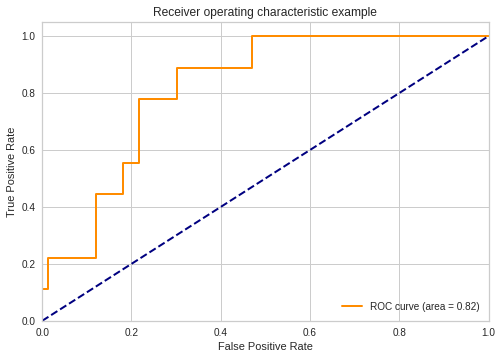

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_i, Y1, test_size = 0.1, random_state = 1)
xg_clf = OneVsRestClassifier(xgboost.XGBClassifier(max_depth=5))
y_pred = xg_clf.fit(x_train, y_train).predict_proba(x_test)
fpr_xg = dict()
tpr_xg = dict()
roc_auc_xg = dict()
for j in range(n_classes):
  fpr_xg[j], tpr_xg[j], _ = roc_curve(y_test[:, j], y_pred[:, j])
  roc_auc_xg[j] = auc(fpr_xg[j], tpr_xg[j])
fpr_xg["micro"], tpr_xg["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_xg["micro"] = auc(fpr_xg["micro"], tpr_xg["micro"])

plt.figure()
lw = 2
plt.plot(fpr_xg[2], tpr_xg[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_xg[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 3. Voting Ensemble

In [ ]:
from itertools import combinations
from sklearn.ensemble import VotingClassifier
from statistics import mean
import math
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model1 = AdaBoostClassifier()
model2 = SVC(kernel = 'rbf', probability=True)
model3 = DecisionTreeClassifier()
model4 = GradientBoostingClassifier(subsample=0.9)
model5 = BaggingClassifier()
model6 = RandomForestClassifier()
model7 = xgboost.XGBClassifier(probability=True)
model8 = algorithms.PNN(std=10, verbose=False)

In [ ]:
li = [model1, model2, model3, model4, model5, model6, model7, model8]
n = ['ada', 'svm', 'dt', 'grad', 'bag', 'rf', 'xg', 'pnn']
di = {'ada':model1, 'svm':model2, 'dt':model3, 'grad':model4, 'bag':model5, 'rf':model6, 'xg':model7, 'pnn':model8}

In [ ]:
def com(a,b):
  return int(math.factorial(a)/(math.factorial(b)*math.factorial(a-b)))

In [ ]:
def ve(p, e, f):
  kfold1 = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  c = combinations(di.keys(),p)
  l=c
  l = list(l)
  estimators = []

  for i in range(0,len(l)):
    l[i] = list(l[i])
    for (j,k) in zip(range(0,p), di.keys()):
      l[i][j] = (l[i][j], di[k])
    l[i] = tuple(l[i])

  temp = []
  for j in l:
    temp.append(list(j))
  estimators.extend(temp)
  ensemble = [[]]*len(estimators)
  r = [[]]*len(estimators)
  rm = [1]*len(estimators)
  for k in range(0,len(estimators)):
    ensemble[k] = VotingClassifier(estimators[k], voting='soft')
    r[k] = model_selection.cross_val_score(ensemble[k], e, f, scoring='roc_auc_ovo_weighted', cv=kfold1, n_jobs=-1).tolist()   #definitely for 2 lev, check multi
    rm[k] = mean(r[k])
  M = max(rm)
  idx = rm.index(M)
  return estimators[idx], M

####8 choose 2

In [ ]:
result_ve2 = []
for a in range(0,len(imptx)):
  result_ve2.append(ve(2, imptx[a], Y))
estim_list2 = []
auc_list2 = []
for j in range(0,len(result_ve2)):
  estim_list2.append(result_ve2[j][0])
  auc_list2.append(result_ve2[j][1])
print(str(auc_list2.index(max(auc_list2))) + ": " + str(max(auc_list2)))

In [ ]:
ve(2, X_i, Y)

([('svm',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('grad',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False))],
 0.8336392990143211)

In [ ]:
ve(2, X_s, Y)

([('xg',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('pnn',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False))],
 0.7711526814218799)

In [ ]:
ve(2, X_k, Y)

([('bag',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('pnn',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False))],
 0.7763118725279603)

####8 choose 3

In [ ]:
ve(3, X_s, Y)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('svm',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('dt',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best'))],
 0.7628623676941325)

In [ ]:
ve(3, X_i, Y)

([('grad',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('rf',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('pnn',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best'))],
 0.8301271265203971)

In [ ]:
ve(3, X_k, Y)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('grad',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('bag',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best'))],
 0.7666104382424195)

In [ ]:
result_ve3 = []
for a in range(0,len(imptx)):
  result_ve3.append(ve(3, imptx[a], Y))
estim_list3 = []
auc_list3 = []
for j in range(0,len(result_ve3)):
  estim_list3.append(result_ve3[j][0])
  auc_list3.append(result_ve3[j][1])
print(str(auc_list3.index(max(auc_list3))) + ": " + str(max(auc_list3)))

####8 choose 4

In [ ]:
ve(4, X_s, Y)

([('svm',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('dt',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('grad',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('rf',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                          

In [ ]:
ve(4, X_i, Y)

([('svm',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('dt',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('bag',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('rf',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           

In [ ]:
ve(4, X_k, Y)

([('svm',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('dt',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('rf',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('pnn',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           

In [ ]:
result_ve4 = []
for a in range(0,len(imptx)):
  result_ve4.append(ve(4, imptx[a], Y))
estim_list4 = []
auc_list4 = []
for j in range(0,len(result_ve4)):
  estim_list4.append(result_ve4[j][0])
  auc_list4.append(result_ve4[j][1])
print(str(auc_list4.index(max(auc_list4))) + ": " + str(max(auc_list4)))

####8 choose 5

In [ ]:
ve(5, X_s, Y)

([('svm',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('dt',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('grad',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('bag',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                         

In [ ]:
ve(5, X_i, Y)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('svm',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('dt',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('grad',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                         

In [ ]:
ve(5, X_k, Y)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('dt',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('grad',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('bag',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                         

In [ ]:
result_ve5 = []
for a in range(0,len(imptx)):
  result_ve5.append(ve(5, imptx[a], Y))
estim_list5 = []
auc_list5 = []
for j in range(0,len(result_ve5)):
  estim_list5.append(result_ve5[j][0])
  auc_list5.append(result_ve5[j][1])
print(str(auc_list5.index(max(auc_list5))) + ": " + str(max(auc_list5)))

####8 choose 6

In [ ]:
ve(6, X_s, Y)

([('svm',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('grad',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('bag',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('rf',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                         

In [ ]:
ve(6, X_i, Y)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('svm',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('grad',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('bag',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                        

In [ ]:
ve(6, X_k, Y)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('svm',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('dt',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('grad',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                         

In [ ]:
result_ve6 = []
for a in range(0,len(imptx)):
  result_ve6.append(ve(6, imptx[a], Y))
estim_list6 = []
auc_list6 = []
for j in range(0,len(result_ve6)):
  estim_list6.append(result_ve6[j][0])
  auc_list6.append(result_ve6[j][1])
print(str(auc_list6.index(max(auc_list6))) + ": " + str(max(auc_list6)))

####8 choose 7

In [ ]:
ve(7, X_s, Y)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('svm',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('dt',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('grad',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                         

In [ ]:
ve(7, X_i, Y)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('svm',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('dt',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('grad',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                         

In [ ]:
ve(7, X_k, Y)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('svm',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('grad',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('bag',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                        

In [ ]:
result_ve7 = []
for a in range(0,len(imptx)):
  result_ve7.append(ve(7, imptx[a], Y))
estim_list7 = []
auc_list7 = []
for j in range(0,len(result_ve7)):
  estim_list7.append(result_ve7[j][0])
  auc_list7.append(result_ve7[j][1])
print(str(auc_list7.index(max(auc_list7))) + ": " + str(max(auc_list7)))

In [ ]:
'''classifiers = li
classifiers = [AdaBoostClassifier(), SVC(kernel = 'rbf', probability=True), DecisionTreeClassifier(), GradientBoostingClassifier(subsample=0.9), BaggingClassifier(),
               RandomForestClassifier(), xgboost.XGBClassifier(probability=True), algorithms.PNN(std=10, verbose=False)]
result_table=pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])'''

fpr = [fpr_ada, fpr_svm, fpr_dt, fpr_sgb, fpr_bdt, fpr_rf, fpr_xg, fpr_pnn]
tpr = [tpr_ada, tpr_svm, tpr_dt, tpr_sgb, tpr_bdt, tpr_rf, tpr_xg, tpr_pnn]
auc = [roc_auc_ada, roc_auc_svm, roc_auc_dt, roc_auc_sgb, roc_auc_bdt, roc_auc_rf, roc_auc_xg, roc_auc_pnn]
'''for cls in range(0,len(classifiers)):
  result_table = result_table.append({'classifiers':classifiers[cls].__class__.__name__,
                                        'fpr':fpr[cls],
                                        'tpr':tpr[cls],
                                        'auc':auc[cls]}, ignore_index=True)'''


"for cls in range(0,len(classifiers)): \n  result_table = result_table.append({'classifiers':classifiers[cls].__class__.__name__,\n                                        'fpr':fpr[cls], \n                                        'tpr':tpr[cls], \n                                        'auc':auc[cls]}, ignore_index=True)"

In [ ]:
auc_d = [1]*8
auc_l = [1]*8

for i in range(0,8):
  auc_d[i] = [(k, v) for k, v in auc[i].items()]
#print(list(auc_d[2][0])[1])
for i in range(0,8):
  auc_l[i] = list(auc_d[i][0])[1]
print(auc_l)

[0.9438212494300046, 0.8757776530039305, 0.8146473779385174, 0.9366379310344827, 0.9251077586206897, 0.9428340834749634, 0.893687707641196, 0.9269461077844311]


In [ ]:
for cls in range(0,len(classifiers)):
  print(classifiers[cls])
'''for i in result_table.index:
  print(i)'''

In [ ]:
result_table.iloc[3][1]

TypeError: ignored

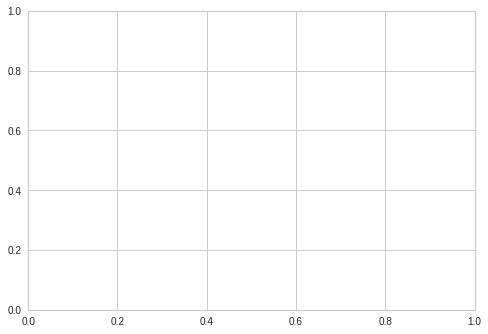

In [ ]:
for i in range(0,8):
  plt.plot(fpr, tpr, label='AUC'+str(auc_l[i]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label='ROC curve (area = %0.2f)' %result_table.iloc[3][i])       #"{}, AUC={:.3f}".format(i, result_table.loc[i]['auc'])

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

TypeError: ignored

<Figure size 576x432 with 0 Axes>

# 2 classes

In [ ]:
Y2 = df.iloc[:,13]
Y2 = Y2.to_list()
for j in range(2,5):
  Y2=[1 if i==j else i for i in Y2]
Y2 = pd.Series(Y2)

## Imputers

Simple Imputer

In [ ]:
X2_s = X_s
X2s_drop = Xs_drop

Iterative Imputer

In [ ]:
X2_i = X_i
X2i_drop = Xi_drop

KNN Imputer

In [ ]:
X2_k = X_k
X2k_drop = Xk_drop

In [ ]:
imptx2 = [X2_s, X2s_drop, X2_i, X2i_drop, X2_k, X2k_drop]

## Models

PNN

In [ ]:
def test_pnn2(e,f,a):
  x_train, x_test, y_train, y_test = train_test_split(e, f, test_size = a, random_state = 1)
  pnn.train(x_train, y_train)
  y_pred = pnn.predict(x_test)
  fpr_pnn, tpr_pnn, thresholds_pnn = roc_curve(y_test, y_pred)
  return metrics.accuracy_score(y_test, y_pred), metrics.roc_auc_score(y_test, y_pred), fpr_pnn, tpr_pnn

SVM

In [ ]:
ker = ['linear', 'poly', 'rbf', 'sigmoid']
def test_svm2(e,f,k,t):
  x_train, x_test, y_train, y_test = train_test_split(e, f, test_size = t, random_state = 1)
  svclassifier = SVC(kernel=k)
  svclassifier.fit(x_train, y_train)
  y_pred = svclassifier.predict(x_test)
  fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred)
  return metrics.accuracy_score(y_test, y_pred), metrics.roc_auc_score(y_test, y_pred), fpr_svm, tpr_svm

Decision Tree

In [ ]:
def test_dt2(x,y,t):
  clf = DecisionTreeClassifier()
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = t, random_state = 1)
  clf = clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred)
  return metrics.accuracy_score(y_test, y_pred), metrics.roc_auc_score(y_test, y_pred), fpr_dt, tpr_dt

####XGBoost

In [ ]:
import xgboost

In [ ]:
df=df3.iloc[1:,:]
X_xgb = df.iloc[:,0:13]
X_xgb = scale(X_xgb)

Xgb_drop = df_drop.iloc[:,0:13]
Xgb_drop = scale(Xgb_drop)

In [ ]:
def test_xg2(e,f,t):
  param = {
    'eta': 0.3,
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 5}

  steps = 20  # The number of training iterations

  x_train, x_test, y_train, y_test = train_test_split(e, f, test_size=t)
  D_train = xgboost.DMatrix(x_train, label=y_train)
  D_test = xgboost.DMatrix(x_test, label=y_test)
  model = xgboost.train(param, D_train, steps)
  pred = model.predict(D_test)
  y_pred = np.asarray([np.argmax(line) for line in pred])
  #return precision_score(y_test, best_pred, average='macro')
  #return recall_score(y_test, best_pred, average='macro')
  fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred)
  return metrics.accuracy_score(y_test, y_pred), metrics.roc_auc_score(y_test, y_pred), fpr_xgb, tpr_xgb

In [ ]:
plot_roc_curve(test_xg2)

## Results

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
def plot_roc_curve(fpr, tpr, auc):
  plt.figure(figsize=(5,5))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, color='red',label='AUC = %0.2f' % auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

### PNN

In [ ]:
result2_pnn = []
for a in range(0,len(imptx2)):
  for i in w:
    result2_pnn.append(test_pnn2(imptx2[a], Y2, i))

acc_list_pnn = []
auc_list_pnn = []
for j in range(0,len(result2_pnn)):
  acc_list_pnn.append(result2_pnn[j][0])
  auc_list_pnn.append(result2_pnn[j][1])
max2_acc_pnn = max(acc_list_pnn)
max2_auc_pnn = max(auc_list_pnn)

for a in range(0,len(imptx2)):
  for i in w:
    if test_pnn2(imptx2[a], Y2, i)[0] == max2_acc_pnn:
      print(str(a) + ", " + str(i) + ": " + str(max2_acc_pnn))
    if test_pnn2(imptx2[a], Y2, i)[1] == max2_auc_pnn:
      print(str(a) + ", " + str(i) + ": " + str(max2_auc_pnn))

2, 0.6500000000000001: 0.8447412353923205
2, 0.6500000000000001: 0.8532612392028838


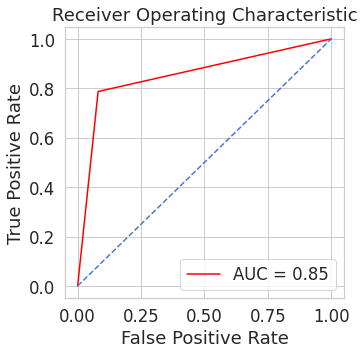

In [ ]:
plot_roc_curve(test_pnn2(imptx2[2],Y2,0.65)[2], test_pnn2(imptx2[2],Y2,0.65)[3], test_pnn2(imptx2[2],Y2,0.65)[1])

### SVM

In [ ]:
for i in w:
  print(test_svm2(X2_s, Y2, 'rbf', i)[1])

In [ ]:
for i in w:
  print(test_svm2(X2_i, Y2, 'rbf', i)[1])

In [ ]:
for i in w:
  print(test_svm2(X2_k, Y2, 'rbf', i)[1])

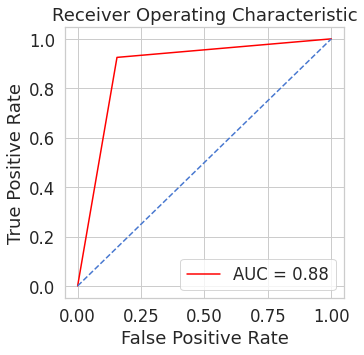

In [ ]:
plot_roc_curve(test_svm2(X2_i, Y2, 'rbf', 0.15)[2], test_svm2(X2_i, Y2, 'rbf', 0.15)[3], test_svm2(X2_i, Y2, 'rbf', 0.15)[1])

In [ ]:
result2_svm = []
for k in ker:
  for a in range(0,len(imptx2)):
    for i in w:
      result2_svm.append(test_svm2(imptx2[a], Y2, k, i))

acc_list_svm = []
auc_list_svm = []
for j in range(0,len(result2_svm)):
  acc_list_svm.append(result2_svm[j][0])
  auc_list_svm.append(result2_svm[j][1])
max2_acc_svm = max(acc_list_svm)
max2_auc_svm = max(auc_list_svm)

for k in ker:
  for a in range(0,len(imptx2)):
    for i in w:
      if test_svm2(imptx2[a], Y2, k, i)[0] == max2_acc_svm:
        print(str(a) + ", " + str(k) + "," + str(i) + ": " + str(max2_acc_svm))
      if test_svm2(imptx2[a], Y2, k, i)[1] == max2_auc_svm:
        print(str(a) + ", " + str(k) + ", " + str(i) + ": " + str(max2_auc_svm))

### Decision Tree

In [ ]:
imptx2_s = [X2_s, X2_i, X2_k]

In [ ]:
for a in range(0,len(imptx2_s)):
  for i in w:                    #X2_i, 0.85
    print(str(a) + "," +str(i) + ":" +str(test_dt2(imptx2_s[a], Y2, i)[1]))

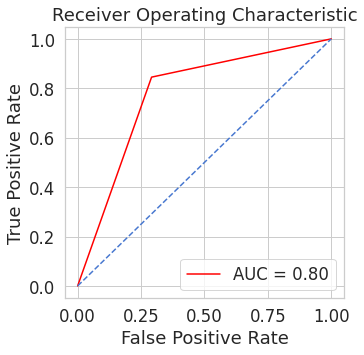

In [ ]:
plot_roc_curve(test_dt2(X2_i, Y2,0.85)[2], test_dt2(X2_i, Y2,0.85)[3], test_dt2(X2_i, Y2, 0.85)[1])

In [ ]:
result2_dt = []
for a in range(0,len(imptx2_s)):
  for i in w:
    result2_dt.append(test_dt2(imptx2_s[a], Y2, i))

acc_list_dt = []
auc_list_dt = []
for j in range(0,len(result2_dt)):
  acc_list_dt.append(result2_dt[j][0])
  auc_list_dt.append(result2_dt[j][1])
max2_acc_dt = max(acc_list_dt)
max2_auc_dt = max(auc_list_dt)

for a in range(0,len(imptx2_s)):
  for i in w:
    if test_dt2(imptx2_s[a], Y2, i)[0] == max2_acc_dt:
      print(str(a) + ", " + str(i) + ": " + str(max2_acc_dt))
    if test_dt2(imptx2[a], Y2, i)[1] == max2_auc_dt:
      print(str(a) + ", " + str(i) + ": " + str(max2_auc_dt))

### XGBoost

In [ ]:
result2_xg = []
for a in range(0,len(imptx2)):
  for i in w:                                          #0-18: 0, 19-36:1, 37-54:2, 55-:3
    result2_xg.append(test_xg2(imptx2[a], Y2, i))

acc_list_xg2 = []
auc_list_xg2 = []
for j in range(0,len(result2_xg)):
  acc_list_xg2.append(result2_xg[j][0])
  auc_list_xg2.append(result2_xg[j][1])
max2_acc_xg = max(acc_list_xg2)
max2_auc_xg = max(auc_list_xg2)
print(max2_acc_xg, max2_auc_xg)
print(auc_list_xg2.index(max2_auc_xg), max2_auc_xg)
'''for a in range(0,len(imptx2)):
  for i in w:
    if test_xg2(imptx2[a], Y2, i)[0] == max2_acc_xg:
      print(str(a) + ", " + str(i) + ": " + str(max2_acc_xg))
    if test_xg2(imptx2[a], Y2, i)[1] == max2_auc_xg:
      print(str(a) + ", " + str(i) + ": " + str(max2_auc_xg))'''

0.9239130434782609 0.9242857142857144
58 0.9242857142857144


'for a in range(0,len(imptx2)):\n  for i in w:\n    if test_xg2(imptx2[a], Y2, i)[0] == max2_acc_xg:\n      print(str(a) + ", " + str(i) + ": " + str(max2_acc_xg))\n    if test_xg2(imptx2[a], Y2, i)[1] == max2_auc_xg:\n      print(str(a) + ", " + str(i) + ": " + str(max2_auc_xg))'

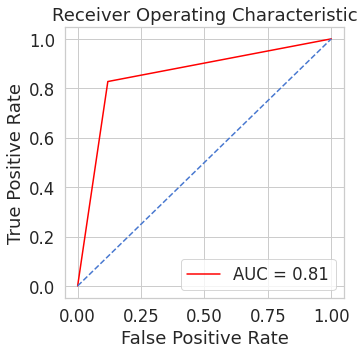

In [ ]:
plot_roc_curve(test_xg2(X2i_drop,Y2,0.2)[2], test_xg2(X2i_drop,Y2,0.2)[3], test_xg2(X2i_drop,Y2,0.2)[1])

### Ensemble Learning

In [ ]:
from sklearn import model_selection

In [ ]:
kfold1= model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

####1. Bagging

Bagged Decision Trees

In [ ]:
clf = DecisionTreeClassifier()
model_bag = BaggingClassifier(base_estimator = clf, n_estimators = 100, random_state = 1)
result2_bag = []
for a in range(0,len(imptx2)):
  r2_bag = model_selection.cross_val_score(model_bag, imptx2[a], Y2, scoring='roc_auc', cv=kfold1, n_jobs=-1)
  result2_bag.append(r2_bag.mean())
max2_bag = max(result2_bag)
for a in range(0,len(imptx2)):
  if model_selection.cross_val_score(model_bag, imptx2[a], Y2, scoring='roc_auc', cv = kfold1, n_jobs=-1).mean() == max2_bag:
    print(str(a) + ":" + str(max2_bag))

2:0.936071622144793


In [ ]:
for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X2_i, Y2, test_size = i, random_state = 1)
  bdt_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 1)
  bag = bdt_clf.fit(x_train, y_train)
  y_pred = bag.predict(x_test)
  fpr2_bdt, tpr2_bdt, thresholds = roc_curve(y_test, y_pred)
  print(metrics.roc_auc_score(y_test, y_pred))

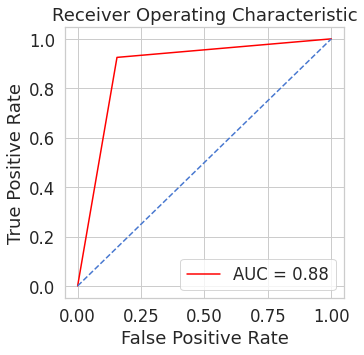

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X2_i, Y2, test_size = 0.15, random_state = 1)
bdt_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 1)
bag = bdt_clf.fit(x_train, y_train)
y_pred = bag.predict(x_test)
fpr2_bdt, tpr2_bdt, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr2_bdt, tpr2_bdt, metrics.roc_auc_score(y_test, y_pred))

Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 100, max_features = 3)
result2_rf = []
for a in range(0,len(imptx2)):
  r2_rf = model_selection.cross_val_score(model_rf, imptx2[a], Y2, scoring = 'roc_auc', cv = kfold1, n_jobs=-1)
  result2_rf.append(r2_rf.mean())
max2_rf = max(result2_rf)
print(str(result2_rf.index(max2_rf)) + ": " + str(max2_rf))

2: 0.9439602946869805


In [ ]:
 for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X2_i, Y2, test_size = i, random_state = 1)
  rf2_clf = RandomForestClassifier(n_estimators = 100, max_features=3)
  rf2 = rf2_clf.fit(x_train, y_train)
  y_pred = rf2.predict(x_test)
  print(metrics.roc_auc_score(y_test, y_pred))

0.8200757575757577
0.845752254390128
0.8668582375478927
0.8605786618444846
0.8532608695652174
0.8564622124863089
0.8701610344280502
0.8770025839793281
0.8944118777628292
0.884599795410241
0.8822901849217639
0.863671458998935
0.8812713958602553
0.8691148684184896
0.8674815710175522
0.8692270260153472
0.8754605088788763
0.8472394339600373
0.8601155824636424


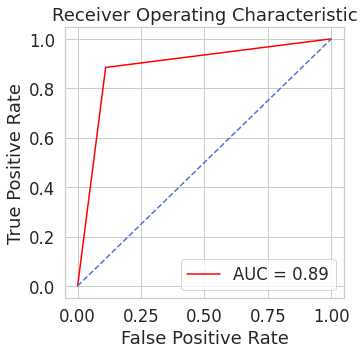

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X2_i, Y2, test_size = w[8], random_state = 1)
rf2_clf = RandomForestClassifier(n_estimators = 100, max_features=3)
rf2 = rf2_clf.fit(x_train, y_train)
y_pred = rf2.predict(x_test)
fpr2_rf, tpr2_rf, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr2_rf, tpr2_rf, metrics.roc_auc_score(y_test, y_pred))

####2. Boosting

Ada Boost

In [ ]:
model_ada = AdaBoostClassifier(n_estimators = 100, random_state = 1)
result2_ada = []
for a in range(0,len(imptx2)):
  r2_ada = model_selection.cross_val_score(model_ada, imptx2[a], Y2, scoring = 'roc_auc', cv = kfold1, n_jobs=-1)
  result2_ada.append(r2_ada.mean())
max2_ada = max(result2_ada)
print(str(result2_ada.index(max2_ada)) + ": " + str(max2_ada))

2: 0.9169844913575187


In [ ]:
 for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X2_i, Y2, test_size = i, random_state = 1)
  model_ada = AdaBoostClassifier(n_estimators = 100, random_state = 1)
  ada2 = model_ada.fit(x_train, y_train)
  y_pred = ada2.predict(x_test)
  print(metrics.roc_auc_score(y_test, y_pred))

0.8863636363636364
0.845752254390128
0.8964452958705833
0.8827606992163953
0.875
0.8776560788608981
0.8870379184515311
0.8988752089983281
0.8956371324236018
0.8839532145683349
0.8655049786628735
0.8539470181043664
0.8681278197193316
0.8621802988098252
0.853517254294421
0.8453977166385926
0.8495196130400212
0.8295447839582669
0.6913567179660873


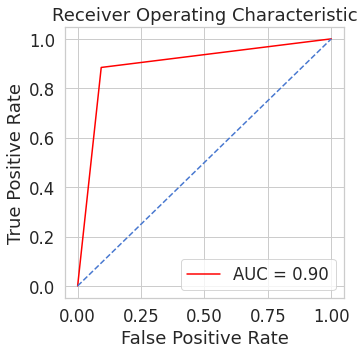

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X2_i, Y2, test_size = w[8], random_state = 1)
model_ada = AdaBoostClassifier(n_estimators = 100, random_state = 1)
ada2 = model_ada.fit(x_train, y_train)
y_pred = ada2.predict(x_test)
fpr2_ada, tpr2_ada, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr2_ada, tpr2_ada, metrics.roc_auc_score(y_test, y_pred))

Stochastic Gradient Boosting

In [ ]:
model_sgb = GradientBoostingClassifier(n_estimators = 100, random_state = 1)
result2_sgb = []
for a in range(0,len(imptx2)):
  r2_sgb = model_selection.cross_val_score(model_sgb, imptx2[a], Y2, scoring = 'roc_auc', cv = kfold1, n_jobs=-1)
  result2_sgb.append(r2_sgb.mean())
max2_sgb = max(result2_sgb)
print(str(result2_sgb.index(max2_sgb)) + ": " + str(max2_sgb))

2: 0.9378089544760992


In [ ]:
 for i in w:
  x_train, x_test, y_train, y_test = train_test_split(X2_i, Y2, test_size = i, random_state = 1)
  model_sgb = GradientBoostingClassifier(n_estimators = 100, random_state = 1)
  sgb2 = model_sgb.fit(x_train, y_train)
  y_pred = sgb2.predict(x_test)
  print(metrics.roc_auc_score(y_test, y_pred))

0.8428030303030303
0.845752254390128
0.8853767560664113
0.8811934900542494
0.8532608695652174
0.8669769989047098
0.8590750436300175
0.8751177990576076
0.8749039015952335
0.8706355793171333
0.8625177809388336
0.8647830138445154
0.8637636310050103
0.861766367337398
0.858833143226817
0.849298147108366
0.8500364431486881
0.8034321188731132
0.7790358602002583


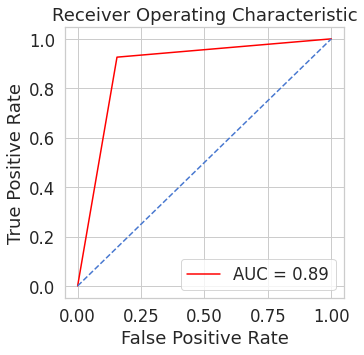

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X2_i, Y2, test_size = w[2], random_state = 1)
model_sgb = GradientBoostingClassifier(n_estimators = 100, random_state = 1)
sgb2 = model_sgb.fit(x_train, y_train)
y_pred = sgb2.predict(x_test)
fpr2_sgb, tpr2_sgb, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr2_sgb, tpr2_sgb, metrics.roc_auc_score(y_test, y_pred))

####3. Voting Ensemble

In [ ]:
from sklearn.linear_model import LogisticRegression
from itertools import combinations

In [ ]:
model1 = AdaBoostClassifier()
model2 = SVC(kernel = 'rbf', probability=True)
model3 = DecisionTreeClassifier()
model4 = GradientBoostingClassifier()
model5 = BaggingClassifier()
model6 = RandomForestClassifier()
model7 = xgboost.XGBClassifier(probability=True)
model8 = algorithms.PNN(std=10, verbose=False)
model9 = LogisticRegression()

In [ ]:
l2 = [model1, model2, model3, model4, model5, model6, model7, model8, model9]
n2 = ['ada', 'svm', 'dt', 'grad', 'bag', 'rf', 'xg', 'pnn', 'lr']
di2 = {'ada':model1, 'svm':model2, 'dt':model3, 'grad':model4, 'bag':model5, 'rf':model6, 'xg':model7, 'pnn':model8, 'lr':model9}

In [ ]:
def ve2(p, e, f):
  kfold1 = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  c = combinations(di2.keys(),p)
  l=c
  l = list(l)
  estimators = []

  for i in range(0,len(l)):
    l[i] = list(l[i])
    for (j,k) in zip(range(0,p), di2.keys()):
      l[i][j] = (l[i][j], di2[k])
    l[i] = tuple(l[i])

  temp = []
  for j in l:
    temp.append(list(j))
  estimators.extend(temp)
  ensemble = [[]]*len(estimators)
  r = [[]]*len(estimators)
  rm = [1]*len(estimators)
  for k in range(0,len(estimators)):
    ensemble[k] = VotingClassifier(estimators[k], voting='soft')
    r[k] = model_selection.cross_val_score(ensemble[k], e, f, scoring = 'roc_auc', cv=kfold1, n_jobs=-1).tolist()   #definitely for 2 lev, check multi
    rm[k] = mean(r[k])
  M = max(rm)
  idx = rm.index(M)
  return estimators[idx], M

In [ ]:
from sklearn.metrics import roc_curve

def plot_ve_roc_curve(y_test, y_pred, ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, y_pred.shape[1] + 1)]

    for i in range(y_pred.shape[1]):
        p = y_pred[:, i]
        fpr, tpr, _ = roc_curve(y_test, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(ytest, ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()

9 choose 2

In [ ]:
result2_ve2 = []
for a in range(0,len(imptx2)):
  result2_ve2.append(ve2(2, imptx2[a], Y2))
estim2_list2 = []
auc2_list2 = []
for j in range(0,len(result2_ve2)):
  estim2_list2.append(result2_ve2[j][0])
  auc2_list2.append(result2_ve2[j][1])
max2_ve2 = max(auc2_list2)

ind2 = auc2_list2.index(max2_ve2)
print(str(ind2) + ": " + str(max2_ve2)) #ve2(2, imptx2[2], Y2)

2: 0.93815504087814


9 choose 3

In [ ]:
result2_ve3 = []
for a in range(0,len(imptx2)):
  result2_ve3.append(ve2(3, imptx2[a], Y2))
estim2_list3 = []
auc2_list3 = []
for j in range(0,len(result2_ve3)):
  estim2_list3.append(result2_ve3[j][0])
  auc2_list3.append(result2_ve3[j][1])
max2_ve3 = max(auc2_list3)

ind3 = auc2_list3.index(max2_ve3)
print(str(ind3) + ": " + str(max2_ve3))

2: 0.9331991983785384


9 choose 4

In [ ]:
result2_ve4 = []
for a in range(0,len(imptx2)):
  result2_ve4.append(ve2(4, imptx2[a], Y2))
estim2_list4 = []
auc2_list4 = []
for j in range(0,len(result2_ve4)):
  estim2_list4.append(result2_ve4[j][0])
  auc2_list4.append(result2_ve4[j][1])
max2_ve4 = max(auc2_list4)

ind4 = auc2_list4.index(max2_ve4)
print(str(ind4) + ": " + str(max2_ve4))

2: 0.9394781717565075


9 choose 5

In [ ]:
result2_ve5 = []
for a in range(0,len(imptx2)):
  result2_ve5.append(ve2(5, imptx2[a], Y2))
estim2_list5 = []
auc2_list5 = []
for j in range(0,len(result2_ve5)):
  estim2_list5.append(result2_ve5[j][0])
  auc2_list5.append(result2_ve5[j][1])
max2_ve5 = max(auc2_list5)

ind5 = auc2_list5.index(max2_ve5)
print(str(ind5) + ": " + str(max2_ve5))

2: 0.9419958780260071


9 choose 6

In [ ]:
result2_ve6 = []
for a in range(0,len(imptx2)):
  result2_ve6.append(ve2(6, imptx2[a], Y2))
estim2_list6 = []
auc2_list6 = []
for j in range(0,len(result2_ve6)):
  estim2_list6.append(result2_ve6[j][0])
  auc2_list6.append(result2_ve6[j][1])
max2_ve6 = max(auc2_list6)

ind6 = auc2_list6.index(max2_ve6)
print(str(ind6) + ": " + str(max2_ve6))

2: 0.9428229145316663


9 choose 7

In [ ]:
result2_ve7 = []
for a in range(0,len(imptx2)):
  result2_ve7.append(ve2(7, imptx2[a], Y2))
estim2_list7 = []
auc2_list7 = []
for j in range(0,len(result2_ve7)):
  estim2_list7.append(result2_ve7[j][0])
  auc2_list7.append(result2_ve7[j][1])
max2_ve7 = max(auc2_list7)

ind7 = auc2_list7.index(max2_ve7)
print(str(ind7) + ": " + str(max2_ve7))

2: 0.9436510441575003


In [ ]:
estim2_list7[2]

[('ada',
  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                     n_estimators=50, random_state=None)),
 ('svm',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False)),
 ('dt',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('grad',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate

In [ ]:
from sklearn import model_selection

9 choose 8

In [ ]:
di3 = {'ada':model1, 'svm':model2, 'dt':model3, 'grad':model4, 'bag':model5, 'rf':model6, 'xg':model7, 'lr':model9} #only for 9 choose 8 - becomes all models in di3

In [ ]:
def ve2_8(e,f):
  c_8 = combinations(di3.keys(),8)
  l_8 = c_8
  l_8 = list(l_8)
  estimators_8 = []
  for i in range(0,len(l_8)):
    l_8[i] = list(l_8[i])
    for (j,k) in zip(range(0,8), di3.keys()):
      l_8[i][j] = (l_8[i][j], di3[k])
    l_8[i] = tuple(l_8[i])

  temp_8 = []
  for j in l_8:
    temp_8.append(list(j))
  estimators_8.extend(temp_8)
  ensemble_8 = [[]]*len(estimators_8)
  r_8 = [[]]*len(estimators_8)
  rm_8 = [1]*len(estimators_8)

  for k in range(0,len(estimators_8)):
    ensemble_8[k] = VotingClassifier(estimators_8[k], voting='soft')
    r_8[k] = model_selection.cross_val_score(ensemble_8[k], e, f, scoring = 'roc_auc', cv=kfold1, n_jobs=-1).tolist()   #definitely for 2 lev, check multi
    rm_8[k] = mean(r_8[k])
  M_8 = max(rm_8)
  idx_8 = rm_8.index(M_8)
  return estimators_8[idx_8], M_8


In [ ]:
result2_ve8 = []
for a in range(0,len(imptx2)):
  result2_ve8.append(ve2_8(imptx2[a], Y2))
estim2_list8 = []
auc2_list8 = []
for j in range(0,len(result2_ve8)):
  estim2_list8.append(result2_ve8[j][0])
  auc2_list8.append(result2_ve8[j][1])
max2_ve8 = max(auc2_list8)

ind8 = auc2_list8.index(max2_ve8)
print(str(ind8) + ": " + str(max2_ve8))

2: 0.9432519642003143


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrclf = LogisticRegression()

In [ ]:
def test_lr(e,f,t):
  X_train, X_test, Y_train, Y_test = train_test_split(e,f, test_size = t)
  lrclf.fit(X_train, Y_train)
  Y_pred = lrclf.predict(X_test)
  fpr_lr, tpr_lr, thresholds = roc_curve(Y_test, Y_pred)
  return metrics.accuracy_score(Y_test, Y_pred), metrics.roc_auc_score(Y_test, Y_pred), fpr_lr, tpr_lr

In [ ]:
result2_lr = []
for a in range(0,len(imptx2_s)):
  for i in w:
    result2_lr.append(test_lr(imptx2_s[a],Y2, i))

acc_lr = []
auc_lr = []
for j in range(0,len(result2_lr)):
  acc_lr.append(result2_lr[j][0])
  auc_lr.append(result2_lr[j][1])                  #19-0, 20-1,21-2,22-3
print(str(acc_lr.index(max(acc_lr))) + ": " + str(max(acc_lr)))
print(str(auc_lr.index(max(auc_lr))) + ": " + str(max(auc_lr)))



22: 0.8913043478260869
23: 0.894686299615877


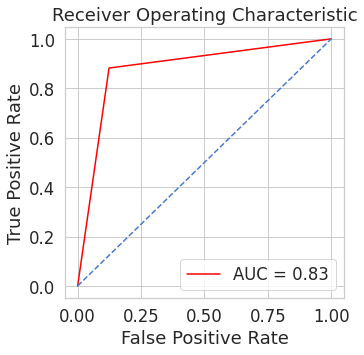

In [ ]:
plot_roc_curve(test_lr(X_i,Y2, 0.25)[2], test_lr(X_i,Y2, 0.25)[3], test_lr(X_i,Y2, 0.25)[1])

##Autoencoder (Using Reconstruction Error)

In [ ]:
import pickle
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


###Simple Imputer

In [ ]:
df=df3.iloc[1:,:]

In [ ]:
def med(x):
  a = df.iloc[:,x].isnull()
  a = a.to_list()
  t = [-1]*920
  f = [-2]*920


  for i in range(0,len(df.iloc[:,x])):
    if a[i]==True:
      t[i]=i
  t=[j for j in t if j!=-1]

  for k in range(0,len(df.iloc[:,x])):
    if a[k]==False:
      f[k]=k
  f=[l for l in f if l!=-2]

  df.iloc[t,x]= np.median(df.iloc[f,x])         #df.iloc[t/f,x] - chained indexing: [[],_]
  return np.median(df.iloc[f,x]), df.iloc[:,x].isnull().sum()
  #return df.iloc[:,x].isnull().sum()

In [ ]:
b = [3,4,7,9]
for n in range(0,len(b)):
  med(b[n])
  print(df.iloc[:,b[n]].isnull().sum())

0
0
0
0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
df = imp.fit_transform(df)
df = pd.DataFrame(df)

In [ ]:
X2_ae_s = df.iloc[:,0:13]
X2_ae_s = StandardScaler().fit_transform(X2_ae_s)
X2_ae_s = pd.DataFrame(X2_ae_s)

In [ ]:
xs_train, xs_test, ys_train, ys_test = train_test_split(X2_ae_s, Y2, test_size = 0.2, random_state = 1)
xs_train = xs_train.values
xs_test = xs_test.values
input_dim_s = xs_train.shape[1]
encoding_dim = 7
input_layer_s = Input(shape=(input_dim_s, ))
encoder_s = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer_s)
encoder_s = Dense(int(encoding_dim / 2), activation="relu")(encoder_s)
decoder_s = Dense(int(encoding_dim / 2), activation='tanh')(encoder_s)
decoder_s = Dense(input_dim_s, activation='relu')(decoder_s)
autoencoder_s = Model(inputs=input_layer_s, outputs=decoder_s);
nb_epoch = 100
batch_size = 32
autoencoder_s.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])
checkpointer_s = ModelCheckpoint(filepath="model_s.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history_s = autoencoder_s.fit(xs_train, xs_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(xs_test, xs_test),
                    verbose=1,
                    callbacks=[checkpointer_s, tensorboard]).history
autoencoder_s = load_model('model_s.h5')

Train on 736 samples, validate on 184 samples
Epoch 1/100
736/736 [==============================] - 0s 445us/step - loss: 1.0194 - accuracy: 0.0639 - val_loss: 0.9897 - val_accuracy: 0.0815
Epoch 2/100
736/736 [==============================] - 0s 51us/step - loss: 0.9997 - accuracy: 0.0856 - val_loss: 0.9737 - val_accuracy: 0.0924
Epoch 3/100
736/736 [==============================] - 0s 52us/step - loss: 0.9847 - accuracy: 0.0992 - val_loss: 0.9616 - val_accuracy: 0.1359
Epoch 4/100
736/736 [==============================] - 0s 58us/step - loss: 0.9724 - accuracy: 0.1291 - val_loss: 0.9511 - val_accuracy: 0.1467
Epoch 5/100
736/736 [==============================] - 0s 53us/step - loss: 0.9617 - accuracy: 0.1467 - val_loss: 0.9416 - val_accuracy: 0.1522
Epoch 6/100
736/736 [==============================] - 0s 53us/step - loss: 0.9522 - accuracy: 0.1481 - val_loss: 0.9335 - val_accuracy: 0.1522
Epoch 7/100
736/736 [==============================] - 0s 53us/step - loss: 0.9439 - accu

###Iterative Imputer

In [ ]:
df=df3.iloc[1:,:]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=1)
# Run df = df3.iloc[1:,:] again before this
imp.fit(df)
df=np.round(imp.transform(df))
df = pd.DataFrame(df)

In [ ]:
X2_ae_i = df.iloc[:,0:13]
X2_ae_i = StandardScaler().fit_transform(X2_ae_i)
X2_ae_i = pd.DataFrame(X2_ae_i)

In [ ]:
xi_train, xi_test, yi_train, yi_test = train_test_split(X2_ae_i, Y2, test_size = 0.2, random_state = 1)
xi_train = xi_train.values
xi_test = xi_test.values
input_dim_i = xi_train.shape[1]
encoding_dim = 7
input_layer_i = Input(shape=(input_dim_i, ))
encoder_i = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer_i)
encoder_i = Dense(int(encoding_dim / 2), activation="relu")(encoder_i)
decoder_i = Dense(int(encoding_dim / 2), activation='tanh')(encoder_i)
decoder_i = Dense(input_dim_i, activation='relu')(decoder_i)
autoencoder_i = Model(inputs=input_layer_i, outputs=decoder_i);
nb_epoch = 100
batch_size = 32
autoencoder_i.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])
checkpointer_i = ModelCheckpoint(filepath="model_i.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history_i = autoencoder_i.fit(xi_train, xi_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(xi_test, xi_test),
                    verbose=1,
                    callbacks=[checkpointer_i, tensorboard]).history
autoencoder_i = load_model('model_i.h5')

Train on 736 samples, validate on 184 samples
Epoch 1/100
736/736 [==============================] - 0s 502us/step - loss: 1.0198 - accuracy: 0.0584 - val_loss: 0.9957 - val_accuracy: 0.0326
Epoch 2/100
736/736 [==============================] - 0s 54us/step - loss: 0.9986 - accuracy: 0.0761 - val_loss: 0.9761 - val_accuracy: 0.0489
Epoch 3/100
736/736 [==============================] - 0s 57us/step - loss: 0.9812 - accuracy: 0.0747 - val_loss: 0.9602 - val_accuracy: 0.0652
Epoch 4/100
736/736 [==============================] - 0s 53us/step - loss: 0.9671 - accuracy: 0.0897 - val_loss: 0.9464 - val_accuracy: 0.0870
Epoch 5/100
736/736 [==============================] - 0s 52us/step - loss: 0.9549 - accuracy: 0.1019 - val_loss: 0.9352 - val_accuracy: 0.1033
Epoch 6/100
736/736 [==============================] - 0s 52us/step - loss: 0.9447 - accuracy: 0.1087 - val_loss: 0.9264 - val_accuracy: 0.1033
Epoch 7/100
736/736 [==============================] - 0s 54us/step - loss: 0.9358 - accu

###KNN Imputer

In [ ]:
df=df3.iloc[1:,:]

In [ ]:
from sklearn.impute import KNNImputer
# Run df = df3.iloc[1:,:] again before this
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df = imputer.fit_transform(df)
df = pd.DataFrame(df)

In [ ]:
X2_ae_k = df.iloc[:,0:13]
X2_ae_k = StandardScaler().fit_transform(X2_ae_k)
X2_ae_k = pd.DataFrame(X2_ae_k)

In [ ]:
xk_train, xk_test, yk_train, yk_test = train_test_split(X2_ae_k, Y2, test_size = 0.2, random_state = 1)
xk_train = xk_train.values
xk_test = xk_test.values
input_dim_k = xk_train.shape[1]
encoding_dim = 7
input_layer_k = Input(shape=(input_dim_k, ))
encoder_k = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer_k)
encoder_k = Dense(int(encoding_dim / 2), activation="relu")(encoder_k)
decoder_k = Dense(int(encoding_dim / 2), activation='tanh')(encoder_k)
decoder_k = Dense(input_dim_i, activation='relu')(decoder_k)
autoencoder_k = Model(inputs=input_layer_k, outputs=decoder_k);
nb_epoch = 100
batch_size = 32
autoencoder_k.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])
checkpointer_k = ModelCheckpoint(filepath="model_k.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history_k = autoencoder_k.fit(xk_train, xk_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(xk_test, xk_test),
                    verbose=1,
                    callbacks=[checkpointer_k, tensorboard]).history
autoencoder_k = load_model('model_k.h5')

Train on 736 samples, validate on 184 samples
Epoch 1/100
736/736 [==============================] - 0s 549us/step - loss: 1.0316 - accuracy: 0.0693 - val_loss: 1.0083 - val_accuracy: 0.0598
Epoch 2/100
736/736 [==============================] - 0s 57us/step - loss: 1.0111 - accuracy: 0.0761 - val_loss: 0.9916 - val_accuracy: 0.0598
Epoch 3/100
736/736 [==============================] - 0s 56us/step - loss: 0.9964 - accuracy: 0.1033 - val_loss: 0.9792 - val_accuracy: 0.1250
Epoch 4/100
736/736 [==============================] - 0s 58us/step - loss: 0.9843 - accuracy: 0.1576 - val_loss: 0.9686 - val_accuracy: 0.1902
Epoch 5/100
736/736 [==============================] - 0s 62us/step - loss: 0.9734 - accuracy: 0.1753 - val_loss: 0.9599 - val_accuracy: 0.2011
Epoch 6/100
736/736 [==============================] - 0s 59us/step - loss: 0.9641 - accuracy: 0.1984 - val_loss: 0.9520 - val_accuracy: 0.2283
Epoch 7/100
736/736 [==============================] - 0s 53us/step - loss: 0.9554 - accu

###Evaluation

The dataset X2_ae_s will be used as it has least val_loss and highest val_accuracy.

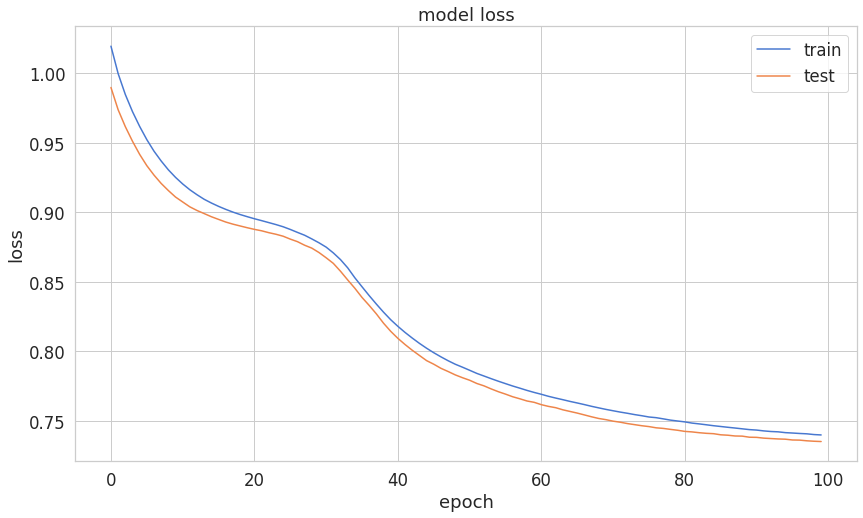

In [ ]:
plt.plot(history_s['loss'])
plt.plot(history_s['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [ ]:
predictions = autoencoder_s.predict(xs_test)
mse = np.mean(np.power(xs_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': ys_test})
error_df.describe()

,reconstruction_error,true_class
count,184.000000,184.000000
mean,0.726740,0.570652
std,0.328156,0.496334
min,0.170760,0.000000
25%,0.508815,0.000000
50%,0.702225,1.000000
75%,0.870801,1.000000
max,2.191252,1.000000


In [ ]:
error_df

,reconstruction_error,true_class
148,0.749067,0.0
449,0.908151,0.0
870,0.430392,0.0
637,0.951840,1.0
889,0.787810,1.0
...,...,...
160,0.929019,0.0
649,0.591911,1.0
915,0.704085,1.0
916,0.674606,0.0


Reconstruction error without class 1

Text(0, 0.5, 'Frequnency')

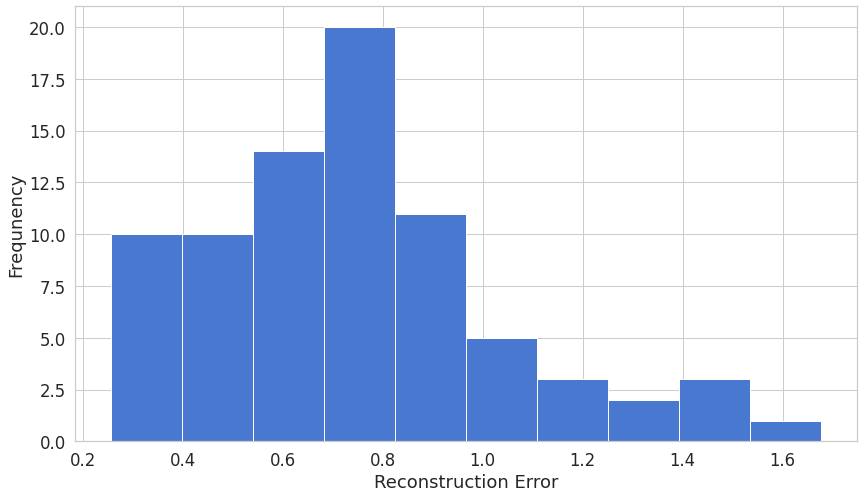

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequnency')

Reconstruction error with class 1

Text(0, 0.5, 'Frequnency')

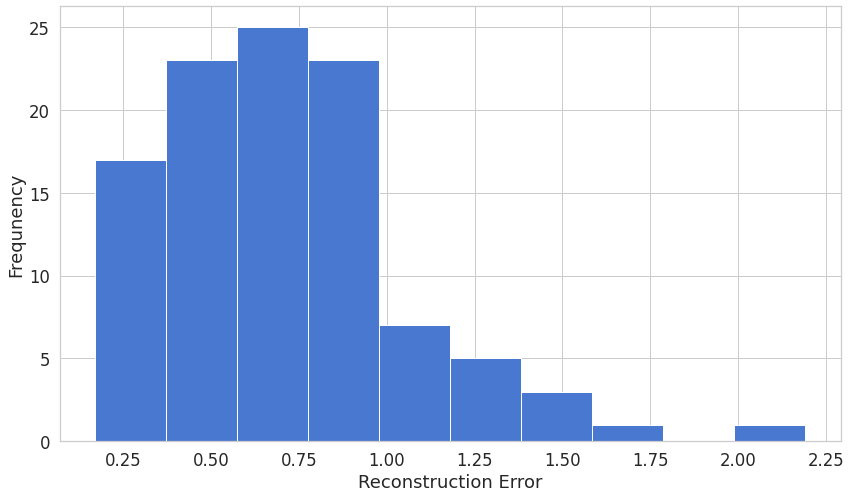

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequnency')

In [ ]:
th_range = np.arange(0, 1.7, 0.20)
opt_th = pd.DataFrame({'threshold': th_range, 'false_neg': range(len(th_range)), 'false_pos': range(len(th_range)) })
for th,k in zip(np.arange(0,1.7,0.20), range(len(th_range))):
  y_pred = [1 if e > th else 0 for e in error_df.reconstruction_error.values]
  j = 0
  t = 0
  for i in range(len(error_df)):
    if error_df.true_class.iloc[i] > y_pred[i]:
      j = j+1
    opt_th.false_neg[k] = j
    if error_df.true_class.iloc[i] < y_pred[i]:
      t = t+1
    opt_th.false_pos[k] = t

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
opt_th.iloc[:,:]

,threshold,false_neg,false_pos
0,0.0,0,79
1,0.2,3,79
2,0.4,20,69
3,0.6,43,58
4,0.8,69,34
5,1.0,88,13
6,1.2,95,7
7,1.4,101,4
8,1.6,103,1


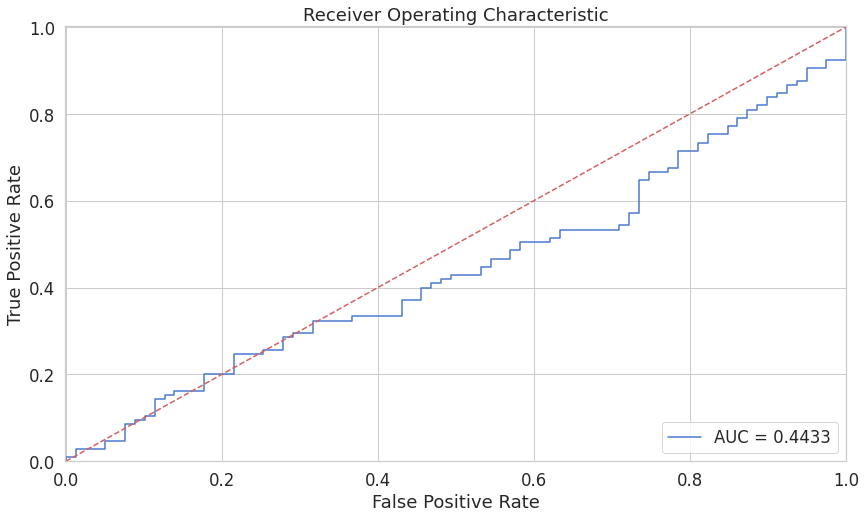

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, roc_auc_score)

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
#roc_auc = roc_auc_score(y_pred, y_test)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Precision vs Recall

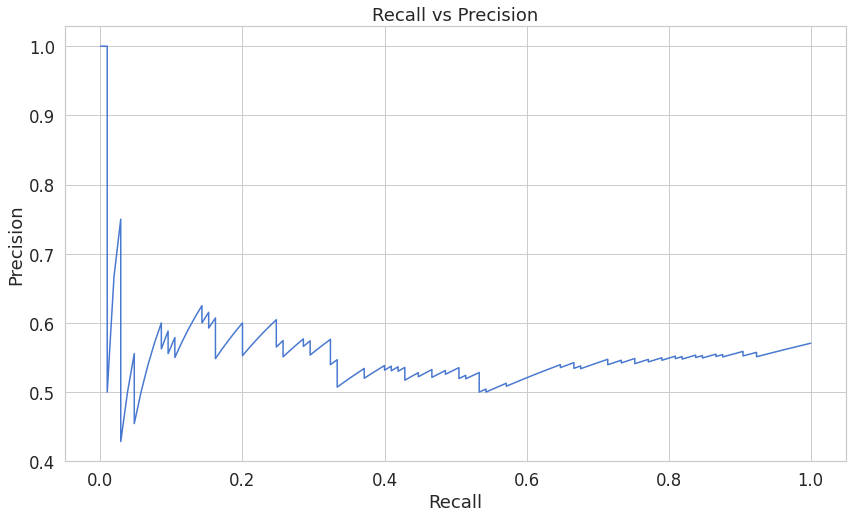

In [ ]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Precision for different thresholds

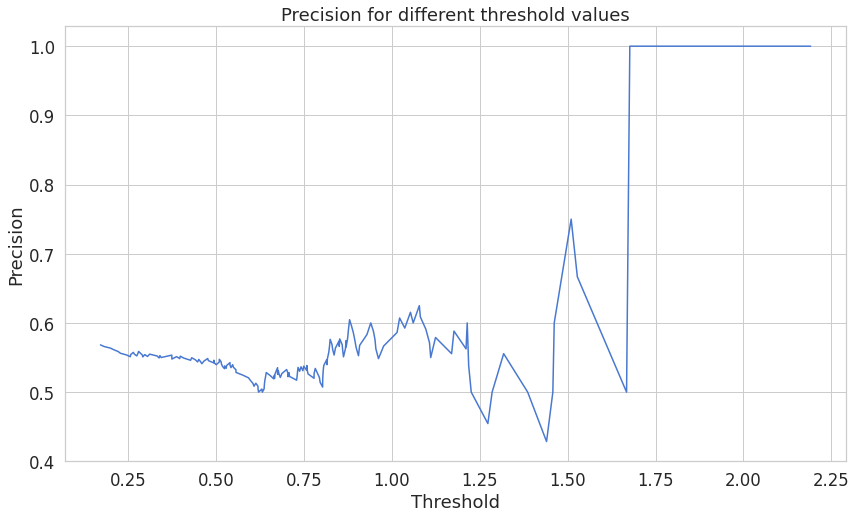

In [ ]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

Recall for different thresholds

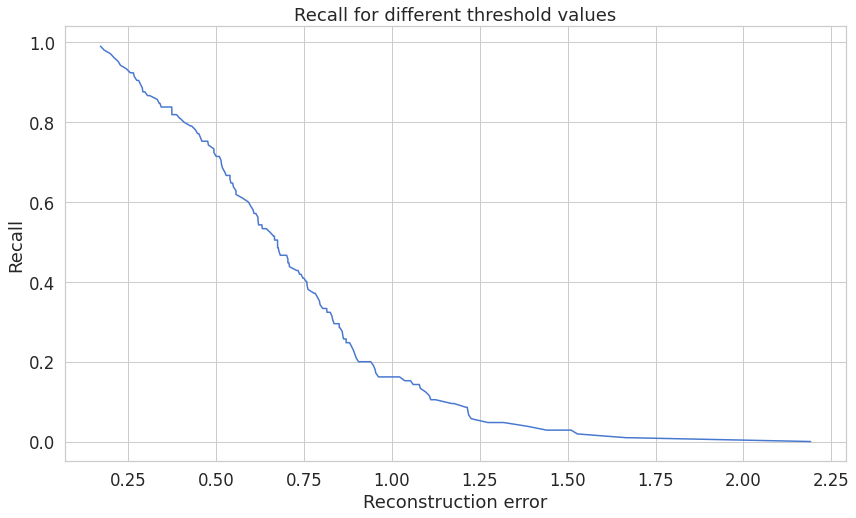

In [ ]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

Prediction

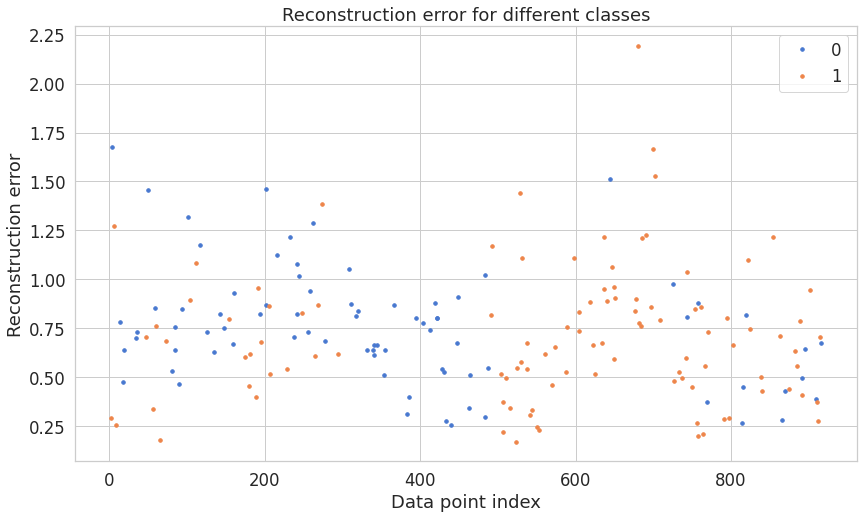

In [ ]:
threshold = 0.2  #reduce no of false neg as much as possible

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "1" if name == 1 else "0")
#ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

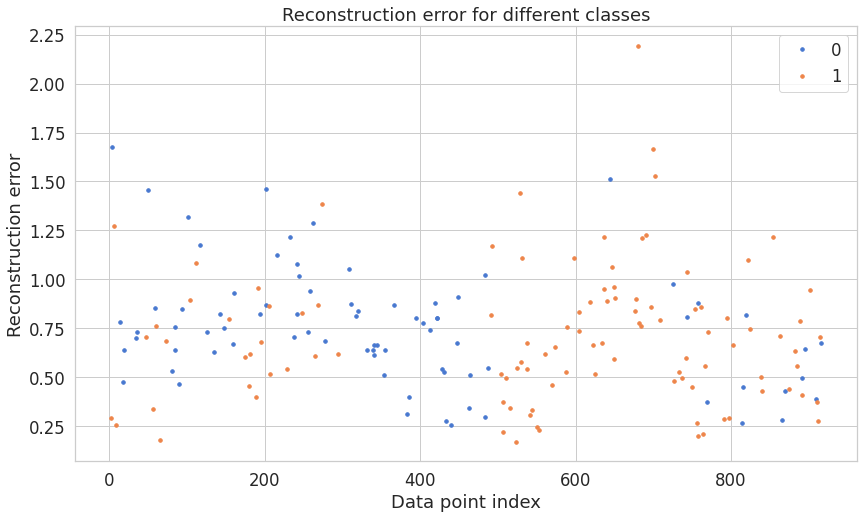

In [ ]:
threshold = 0.4  #reduce no of false neg as much as possible

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "1" if name == 1 else "0")
#ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Confusion Matrix

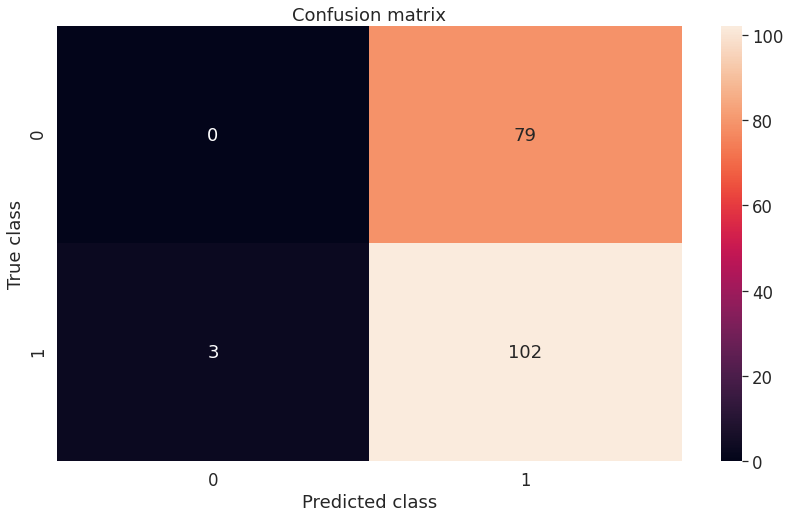

In [ ]:
from sklearn.metrics import confusion_matrix
LABELS = ['0', '1']
threshold = 0.2
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure()
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = 'd');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

##Autoencoded Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

####Simple Imputer

In [ ]:
#Xs_scaled = MinMaxScaler().fit_transform(X2_s)
Xs_0_scaled = X2_ae_s[Y2 == 0]
Xs_1_scaled = X2_ae_s[Y2 == 1]

input_layer_s = Input(shape =(X2_ae_s.shape[1], ))


encoded_s = Dense(100, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(input_layer_s)
encoded_s = Dense(50, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded_s)
encoded_s = Dense(25, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded_s)
encoded_s = Dense(12, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded_s)
encoded_s = Dense(6, activation ='relu')(encoded_s)

# Building the Decoder network
decoded_s = Dense(12, activation ='tanh')(encoded_s)
decoded_s = Dense(25, activation ='tanh')(decoded_s)
decoded_s = Dense(50, activation ='tanh')(decoded_s)
decoded_s = Dense(100, activation ='tanh')(decoded_s)

# Building the Output Layer
output_layer_s = Dense(X2_ae_s.shape[1], activation ='relu')(decoded_s)

# Defining the parameters of the Auto-encoder network
autoencoder_s = Model(input_layer_s, output_layer_s)
autoencoder_s.compile(optimizer ="adadelta", loss ="mse")

# Training the Auto-encoder network
autoencoder_s.fit(Xs_0_scaled, Xs_0_scaled,
                batch_size = 16, epochs = 100,
                shuffle = True, validation_split = 0.20)

hidden_representation_s = Sequential()
hidden_representation_s.add(autoencoder_s.layers[0])
hidden_representation_s.add(autoencoder_s.layers[1])
hidden_representation_s.add(autoencoder_s.layers[2])
hidden_representation_s.add(autoencoder_s.layers[3])
hidden_representation_s.add(autoencoder_s.layers[4])

# Separating the points encoded by the Auto-encoder as normal and fraud
class0_hidden_rep_s = hidden_representation_s.predict(Xs_0_scaled)
class1_hidden_rep_s = hidden_representation_s.predict(Xs_1_scaled)

# Combining the encoded points into a single table
encoded_xs = np.append(class0_hidden_rep_s, class1_hidden_rep_s, axis = 0)
y_0_s = np.zeros(class0_hidden_rep_s.shape[0])
y_1_s = np.ones(class1_hidden_rep_s.shape[0])
encoded_ys = np.append(y_0_s, y_1_s)
encoded_ys = pd.Series(encoded_ys)

Train on 328 samples, validate on 83 samples
Epoch 1/100
328/328 [==============================] - 1s 3ms/step - loss: 0.9418 - val_loss: 0.8477
Epoch 2/100
328/328 [==============================] - 0s 161us/step - loss: 0.8717 - val_loss: 0.8115
Epoch 3/100
328/328 [==============================] - 0s 162us/step - loss: 0.8415 - val_loss: 0.7933
Epoch 4/100
328/328 [==============================] - 0s 155us/step - loss: 0.8283 - val_loss: 0.7819
Epoch 5/100
328/328 [==============================] - 0s 152us/step - loss: 0.8182 - val_loss: 0.7709
Epoch 6/100
328/328 [==============================] - 0s 169us/step - loss: 0.8088 - val_loss: 0.7591
Epoch 7/100
328/328 [==============================] - 0s 168us/step - loss: 0.8029 - val_loss: 0.7598
Epoch 8/100
328/328 [==============================] - 0s 160us/step - loss: 0.7990 - val_loss: 0.7513
Epoch 9/100
328/328 [==============================] - 0s 162us/step - loss: 0.7965 - val_loss: 0.7453
Epoch 10/100
328/328 [========

###Iterative Imputer

In [ ]:
#Xi_scaled = MinMaxScaler().fit_transform(X2_i)
Xi_0_scaled = X2_ae_i[Y2 == 0]
Xi_1_scaled = X2_ae_i[Y2 == 1]

input_layer_i = Input(shape =(X2_ae_i.shape[1], ))


encoded_i = Dense(100, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(input_layer_i)
encoded_i = Dense(50, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded_i)
encoded_i = Dense(25, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded_i)
encoded_i = Dense(12, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded_i)
encoded_i = Dense(6, activation ='relu')(encoded_i)

# Building the Decoder network
decoded_i = Dense(12, activation ='tanh')(encoded_i)
decoded_i = Dense(25, activation ='tanh')(decoded_i)
decoded_i = Dense(50, activation ='tanh')(decoded_i)
decoded_i = Dense(100, activation ='tanh')(decoded_i)

# Building the Output Layer
output_layer_i = Dense(X2_ae_i.shape[1], activation ='relu')(decoded_i)

# Defining the parameters of the Auto-encoder network
autoencoder_i = Model(input_layer_i, output_layer_i)
autoencoder_i.compile(optimizer ="adadelta", loss ="mse")

# Training the Auto-encoder network
autoencoder_i.fit(Xi_0_scaled, Xi_0_scaled,
                batch_size = 16, epochs = 100,
                shuffle = True, validation_split = 0.20)

hidden_representation_i = Sequential()
hidden_representation_i.add(autoencoder_i.layers[0])
hidden_representation_i.add(autoencoder_i.layers[1])
hidden_representation_i.add(autoencoder_i.layers[2])
hidden_representation_i.add(autoencoder_i.layers[3])
hidden_representation_i.add(autoencoder_i.layers[4])

# Separating the points encoded by the Auto-encoder as normal and fraud
class0_hidden_rep_i = hidden_representation_i.predict(Xi_0_scaled)
class1_hidden_rep_i = hidden_representation_i.predict(Xi_1_scaled)

# Combining the encoded points into a single table
encoded_xi = np.append(class0_hidden_rep_i, class1_hidden_rep_i, axis = 0)
y_0_i = np.zeros(class0_hidden_rep_i.shape[0])
y_1_i = np.ones(class1_hidden_rep_i.shape[0])
encoded_yi = np.append(y_0_i, y_1_i)
encoded_yi = pd.Series(encoded_yi)

Train on 328 samples, validate on 83 samples
Epoch 1/100
328/328 [==============================] - 1s 3ms/step - loss: 1.0613 - val_loss: 0.8716
Epoch 2/100
328/328 [==============================] - 0s 200us/step - loss: 1.0156 - val_loss: 0.8436
Epoch 3/100
328/328 [==============================] - 0s 158us/step - loss: 0.9842 - val_loss: 0.8326
Epoch 4/100
328/328 [==============================] - 0s 165us/step - loss: 0.9328 - val_loss: 0.8094
Epoch 5/100
328/328 [==============================] - 0s 158us/step - loss: 0.9154 - val_loss: 0.7889
Epoch 6/100
328/328 [==============================] - 0s 165us/step - loss: 0.9089 - val_loss: 0.7839
Epoch 7/100
328/328 [==============================] - 0s 158us/step - loss: 0.9043 - val_loss: 0.7704
Epoch 8/100
328/328 [==============================] - 0s 155us/step - loss: 0.8949 - val_loss: 0.7677
Epoch 9/100
328/328 [==============================] - 0s 156us/step - loss: 0.8921 - val_loss: 0.7565
Epoch 10/100
328/328 [========

####KNN Imputer

In [ ]:
#Xk_scaled = MinMaxScaler().fit_transform(X2_k)
Xk_0_scaled = X2_ae_k[Y2 == 0]
Xk_1_scaled = X2_ae_k[Y2 == 1]

input_layer_k = Input(shape =(X2_ae_k.shape[1], ))


encoded_k = Dense(100, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(input_layer_k)
encoded_k = Dense(50, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded_k)
encoded_k = Dense(25, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded_k)
encoded_k = Dense(12, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded_k)
encoded_k = Dense(6, activation ='relu')(encoded_k)

# Building the Decoder network
decoded_k = Dense(12, activation ='tanh')(encoded_k)
decoded_k = Dense(25, activation ='tanh')(decoded_k)
decoded_k = Dense(50, activation ='tanh')(decoded_k)
decoded_k = Dense(100, activation ='tanh')(decoded_k)

# Building the Output Layer
output_layer_k = Dense(X2_ae_k.shape[1], activation ='relu')(decoded_k)

# Defining the parameters of the Auto-encoder network
autoencoder_k = Model(input_layer_k, output_layer_k)
autoencoder_k.compile(optimizer ="adadelta", loss ="mse")

# Training the Auto-encoder network
autoencoder_k.fit(Xk_0_scaled, Xk_0_scaled,
                batch_size = 16, epochs = 100,
                shuffle = True, validation_split = 0.20)

hidden_representation_k = Sequential()
hidden_representation_k.add(autoencoder_k.layers[0])
hidden_representation_k.add(autoencoder_k.layers[1])
hidden_representation_k.add(autoencoder_k.layers[2])
hidden_representation_k.add(autoencoder_k.layers[3])
hidden_representation_k.add(autoencoder_k.layers[4])

# Separating the points encoded by the Auto-encoder as normal and fraud
class0_hidden_rep_k = hidden_representation_k.predict(Xk_0_scaled)
class1_hidden_rep_k = hidden_representation_k.predict(Xk_1_scaled)

# Combining the encoded points into a single table
encoded_xk = np.append(class0_hidden_rep_k, class1_hidden_rep_k, axis = 0)
y_0_k = np.zeros(class0_hidden_rep_k.shape[0])
y_1_k = np.ones(class1_hidden_rep_k.shape[0])
encoded_yk = np.append(y_0_k, y_1_k)
encoded_yk = pd.Series(encoded_yk)

Train on 328 samples, validate on 83 samples
Epoch 1/100
328/328 [==============================] - 1s 4ms/step - loss: 1.0225 - val_loss: 0.9001
Epoch 2/100
328/328 [==============================] - 0s 167us/step - loss: 0.9473 - val_loss: 0.8901
Epoch 3/100
328/328 [==============================] - 0s 155us/step - loss: 0.9295 - val_loss: 0.8809
Epoch 4/100
328/328 [==============================] - 0s 159us/step - loss: 0.9192 - val_loss: 0.8657
Epoch 5/100
328/328 [==============================] - 0s 162us/step - loss: 0.9054 - val_loss: 0.8451
Epoch 6/100
328/328 [==============================] - 0s 169us/step - loss: 0.8954 - val_loss: 0.8308
Epoch 7/100
328/328 [==============================] - 0s 161us/step - loss: 0.8866 - val_loss: 0.8203
Epoch 8/100
328/328 [==============================] - 0s 164us/step - loss: 0.8774 - val_loss: 0.8193
Epoch 9/100
328/328 [==============================] - 0s 177us/step - loss: 0.8698 - val_loss: 0.8024
Epoch 10/100
328/328 [========

###Evaluation

###Logistic Regression

In [ ]:
lrclf = LogisticRegression()
res_lr = []
for i in w:
  res_lr.append((test_lr(encoded_xs, encoded_ys, i)[0], test_lr(encoded_xs, encoded_ys, i)[1]))
acc_lr_ae = []
auc_lr_ae = []
for j in range(0,len(res_lr)):
  acc_lr_ae.append(res_lr[j][0])
  auc_lr_ae.append(res_lr[j][1])
print(str(acc_lr_ae.index(max(acc_lr_ae))) + ": " + str(max(acc_lr_ae)))
print(str(auc_lr_ae.index(max(auc_lr_ae))) + ": " + str(max(auc_lr_ae)))

1: 0.7717391304347826
4: 0.7563492063492064


In [ ]:
plot

###Decision Tree

In [ ]:
dtclf = DecisionTreeClassifier()
dt_ae = []
for i in w:
  xs_train_encoded, xs_test_encoded, ys_train_encoded, ys_test_encoded = train_test_split(encoded_xs, encoded_ys, test_size = i)
  dtclf.fit(xs_train_encoded, ys_train_encoded)
  ys_pred_dtclf = dtclf.predict(xs_test_encoded)
  dt_ae.append((accuracy_score(ys_test_encoded, ys_pred_dtclf), roc_auc_score(ys_test_encoded, ys_pred_dtclf)))
acc_dt_ae = []
auc_dt_ae = []
for j in range(0,len(dt_ae)):
  acc_dt_ae.append(dt_ae[j][0])
  auc_dt_ae.append(dt_ae[j][1])
print(str(acc_dt_ae.index(max(acc_dt_ae))) + ": " + str(max(acc_dt_ae)))
print(str(auc_dt_ae.index(max(auc_dt_ae))) + ": " + str(max(auc_dt_ae)))

7: 0.7038043478260869
7: 0.70086666064819


###PNN

In [ ]:
pnnclf = algorithms.PNN(std=10, verbose=False)
pnn_ae = []
for i in w:
  xs_train_encoded, xs_test_encoded, ys_train_encoded, ys_test_encoded = train_test_split(encoded_xs, encoded_ys, test_size = i)
  pnnclf.train(xs_train_encoded, ys_train_encoded)
  ys_pred_pnnclf = pnnclf.predict(xs_test_encoded)
  pnn_ae.append((accuracy_score(ys_test_encoded, ys_pred_pnnclf), roc_auc_score(ys_test_encoded, ys_pred_pnnclf)))
acc_pnn_ae = []
auc_pnn_ae = []
for j in range(0,len(pnn_ae)):
  acc_pnn_ae.append(pnn_ae[j][0])
  auc_pnn_ae.append(pnn_ae[j][1])
print(str(acc_pnn_ae.index(max(acc_pnn_ae))) + ": " + str(max(acc_pnn_ae)))
print(str(auc_pnn_ae.index(max(auc_pnn_ae))) + ": " + str(max(auc_pnn_ae)))

0: 0.6304347826086957
6: 0.6572586902545003


###SVM

In [ ]:
ker = ['linear', 'poly', 'rbf', 'sigmoid']
svm_ae = []
for k in ker:
  for i in w:
    svmclf = SVC(kernel=k)
    xs_train_encoded, xs_test_encoded, ys_train_encoded, ys_test_encoded = train_test_split(encoded_xs, encoded_ys, test_size = i)
    svmclf.fit(xs_train_encoded, ys_train_encoded)
    ys_pred_svmclf = svmclf.predict(xs_test_encoded)
    svm_ae.append((accuracy_score(ys_test_encoded, ys_pred_svmclf), roc_auc_score(ys_test_encoded, ys_pred_svmclf)))
acc_svm_ae = []
auc_svm_ae = []
for j in range(0,len(svm_ae)):
  acc_svm_ae.append(svm_ae[j][0])
  auc_svm_ae.append(svm_ae[j][1])
print(str(acc_svm_ae.index(max(acc_svm_ae))) + ": " + str(max(acc_svm_ae)))
print(str(auc_svm_ae.index(max(auc_svm_ae))) + ": " + str(max(auc_svm_ae)))
#print(str(i) + ", " + str(k) + ": " + str(accuracy_score(yi_test_encoded, yi_pred_svmclf)) + ", " + str(roc_auc_score(yi_test_encoded, yi_pred_svmclf)))

41: 0.8260869565217391
41: 0.8213375409637091


In [ ]:
svmclf = SVC(kernel='rbf')
xs_train_encoded, xs_test_encoded, ys_train_encoded, ys_test_encoded = train_test_split(encoded_xs, encoded_ys, test_size = )
svmclf.fit(xs_train_encoded, ys_train_encoded)
ys_pred_svmclf = svmclf.predict(xs_test_encoded)

###XGBoost

In [ ]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [ ]:
param = {
    'eta': 0.3,
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 5}

steps = 20

In [ ]:
for i in w:
  xs_train_encoded, xs_test_encoded, ys_train_encoded, ys_test_encoded = train_test_split(encoded_xs, encoded_ys, test_size = i)
  Ds_train_encoded = xgboost.DMatrix(xs_train_encoded, label=ys_train_encoded)
  Ds_test_encoded = xgboost.DMatrix(xs_test_encoded, label=ys_test_encoded)
  model_s = xgboost.train(param, Ds_train_encoded, steps)
  preds_encoded = model_s.predict(Ds_test_encoded)
  ys_pred_xg = np.asarray([np.argmax(line) for line in preds_encoded])
  #print(precision_score(y_test, best_pred, average='macro'))
  #print(recall_score(y_test, best_pred, average='macro'))
  print(str(i) + ": " + str(accuracy_score(ys_test_encoded, ys_pred_xg)) + ", " + str(roc_auc_score(ys_test_encoded, ys_pred_xg)))

0.05: 0.6956521739130435, 0.6904761904761906
0.1: 0.7717391304347826, 0.7717391304347827
0.15000000000000002: 0.762589928057554, 0.7538394032470384
0.2: 0.7989130434782609, 0.7992424242424242
0.25: 0.7521739130434782, 0.7454314133703447
0.3: 0.7246376811594203, 0.7162661242841085
0.35000000000000003: 0.7523219814241486, 0.7436033278392591
0.4: 0.7581521739130435, 0.7491623147281674
0.45: 0.7270531400966184, 0.7197282099343956
0.5: 0.7130434782608696, 0.7074286585714558
0.55: 0.7416173570019724, 0.7414529914529915
0.6000000000000001: 0.72875226039783, 0.7253833094593878
0.6500000000000001: 0.7412353923205343, 0.7346209994385177
0.7000000000000001: 0.7348837209302326, 0.7357218402961396
0.7500000000000001: 0.7337192474674384, 0.737219727127352
0.8: 0.6983695652173914, 0.6973455718184074
0.8500000000000001: 0.7151979565772669, 0.7051090223581522
0.9000000000000001: 0.7165259348612787, 0.7022506904859847
0.9500000000000001: 0.6994285714285714, 0.6910007074002513


### Ensemble Learning

In [ ]:
from sklearn import model_selection

In [ ]:
kfold1= model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


####1. Bagging

Bagged Decision Trees

In [ ]:
clf = DecisionTreeClassifier()
model_bag = BaggingClassifier(base_estimator = clf, n_estimators = 100, random_state = 1)
r2_bag = model_selection.cross_val_score(model_bag, encoded_xs, encoded_ys, scoring='roc_auc', cv=kfold1, n_jobs=-1)
print(r2_bag.mean())

0.8136276787137621


Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 100, max_features = 3)
r2_rf = model_selection.cross_val_score(model_rf, encoded_xs, encoded_ys, scoring = 'roc_auc', cv = kfold1, n_jobs=-1)
print(r2_rf.mean())

0.8209634374074833


####2. Boosting

Ada Boost

In [ ]:
model_ada = AdaBoostClassifier(n_estimators = 100, random_state = 1)
r2_ada = model_selection.cross_val_score(model_ada, encoded_xs, encoded_ys, scoring = 'roc_auc', cv = kfold1, n_jobs=-1)
print(r2_ada.mean())

0.7864923481587758


Stochastic Gradient Boosting

In [ ]:
model_sgb = GradientBoostingClassifier(n_estimators = 100, random_state = 1)
r2_sgb = model_selection.cross_val_score(model_sgb, encoded_xs, encoded_ys, scoring = 'roc_auc', cv = kfold1, n_jobs=-1)
print(r2_sgb.mean())

0.8077848375122407


####3. Voting Ensemble

9 choose 2

In [ ]:
ve2(2, encoded_xs, encoded_ys)

([('svm',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('dt',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False))],
 0.8326419120493725)

9 choose 3

In [ ]:
ve2(3, encoded_xs, encoded_ys)

([('grad',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('pnn',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('lr',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best'))],
 0.8042798843114481)

9 choose 4

In [ ]:
ve2(4, encoded_xs, encoded_ys)

([('dt',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('grad',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('bag',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('lr',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                          

9 choose 5

In [ ]:
ve2(5, encoded_xs, encoded_ys)

([('svm',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('dt',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('grad',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('rf',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                          

9 choose 6

In [ ]:
ve2(6, encoded_xs, encoded_ys)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('dt',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('bag',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('rf',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           

9 choose 7

In [ ]:
ve2(7, encoded_xs, encoded_ys)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('svm',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('grad',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('rf',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                         

9 choose 8

In [ ]:
ve2_8(encoded_xs, encoded_ys)

([('ada',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                      n_estimators=50, random_state=None)),
  ('svm',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False)),
  ('dt',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best')),
  ('grad',
   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                         